In [1]:
import ginsim
import maboss
import biolqm
from colomoto_jupyter import tabulate
import matplotlib.pyplot as plt

This notebook has been executed using the docker image `colomoto/colomoto-docker:2022-07-01`

# Study of Drug Response Using the Complete Target Profile Compared to Only the Main Target

To study drug responses a logical model representing actively growing AGS cells where retrieved (Flobak et al., 2015). The model was produced by GINsim (Naldi et al., 2018a). 

In [4]:
# Load network file 

net = ginsim.load("/tmp/colomotokqigsgms_pcbi.1004426.s003.zginml")

In [3]:
# Show thw gene regulatory network

ginsim.show(net)

The network is converted to a boolean network to simulate responses. 

In [4]:
# Concevert the network to a pint model
# Delete if not used?

net_pint = ginsim.to_pint(net)

net_pint.summary()

{'nb_automata': 77,
 'nb_local_states': 160,
 'max_local_states': 4,
 'nb_transitions': 253,
 'nb_states': 1360041547066457821544448}

# Stochastic Boolean Modeling 

To study drug responses the cancer cells are set to be actively growing (proliferating) by intially setting the three nodes respresenting the levels of prosurvival to be active. 

In [5]:
# Convert the bioLQM model to MaBoSS format

sim = ginsim.to_maboss(net)

# Set initial states isstate 
# The propability for prosurvival to be 0 is 0, consecuently, it is a 100% probability for these nodes to be active in the begining. 

sim.network.set_istate("Prosurvival_b1", [0, 1]) # Prosurvival_b1 is active
sim.network.set_istate("Prosurvival_b2", [0, 1]) # Prosurvival_b2 is active
sim.network.set_istate("Prosurvival_b3", [0, 1]) # Prosurvival_b3 is active

sim.get_initial_state() # Verify initial state

Warning, node Prosurvival_b1 was previously bound to other nodes


{'RTPK': 0,
 'SHC1': 0,
 'GRB2': 0,
 'SOS': 0,
 'Ras': 0,
 'Raf': 0,
 'MEK': 0,
 'ERK': 0,
 'DUSP6': 0,
 'TAK1': 0,
 'MKK3': 0,
 'ASK1': 0,
 'TAB': 0,
 'p38alpha': 0,
 'DUSP1': 0,
 'MKK4': 0,
 'MKK7': 0,
 'MEKK4': 0,
 'MLK3': 0,
 'Rac': 0,
 'JNK': 0,
 'GRAP2': 0,
 'SHP2': 0,
 'GAB': 0,
 'IKKB': 0,
 'IKKA': 0,
 'AKT': 0,
 'IRS1': 0,
 'Caspase8': 0,
 'PTENgene': 0,
 'Caspase9': 0,
 'FOXO': 0,
 'TSC': 0,
 'pras40': 0,
 'BCL2': 0,
 'p53': 0,
 'Rheb': 0,
 'mTORC1': 0,
 'PTEN': 0,
 'BAD': 0,
 'mTORC2': 0,
 'MDM2gene': 0,
 'S6K': 0,
 'MDM2': 0,
 'CytochromeC': 0,
 'BAX': 0,
 'NFkB': 0,
 'MAP3K8': 0,
 'PI3K': 0,
 'PDK1': 0,
 'LRP': 0,
 'ITCH': 0,
 'DKK1': 0,
 'Fz': 0,
 'Axin': 0,
 'GSK3': 0,
 'RTPKgene': 0,
 'RSK': 0,
 'MSK': 0,
 'CFLAR': 0,
 'CK1': 0,
 'Dvl': 0,
 'SFRP1': 0,
 'SFRP1gene': 0,
 'betacatenin': 0,
 'betaTrCP': 0,
 'MMP': 0,
 'Egr1': 0,
 'LEF': 0,
 'cMYC': 0,
 'TCF': 0,
 'NLK': 0,
 'DKK1gene': 0,
 'Antisurvival_b1': 0,
 'Antisurvival_b2': 0,
 'Antisurvival_b3': 0,
 'Caspase37_b1':

In [7]:
# Select output nodes of interest

sim.network.set_output(('Prosurvival_b1','Prosurvival_b2', 'Prosurvival_b3', 'Antisurvival_b1', 'Antisurvival_b2', 'Antisurvival_b3'))

In [7]:
biolqm_model = maboss.to_biolqm(sim)

fixpoints_pro = biolqm.fixpoints(biolqm_model)

tabulate(fixpoints_pro)

,MEK,p38alpha,RTPKgene,MMP,RTPK,PTEN,SHC1,GRB2,ERK,SOS,SHP2,Ras,AKT,Rheb,Raf,MAP3K8,DUSP6,mTORC1,TAB,TAK1,ASK1,MKK3,DUSP1,MKK4,MSK,MEKK4,MLK3,GRAP2,MKK7,Rac,mTORC2,Dvl,JNK,GAB,p53,IKKB,IKKA,PDK1,S6K,IRS1,CFLAR,Caspase8,Egr1,PTENgene,CytochromeC,Caspase9,NLK,FOXO,GSK3,RSK,TSC,pras40,BAD,BCL2,MDM2,NFkB,MDM2gene,BAX,PI3K,DKK1,Fz,LRP,ITCH,DKK1gene,SFRP1,Antisurvival_b1,Caspase37_b1,Antisurvival_b2,Caspase37_b2,Antisurvival_b3,Axin,CK1,SFRP1gene,cMYC,betaTrCP,betacatenin,LEF,TCF,Prosurvival_b1,CCND1_b1,Prosurvival_b2,CCND1_b2,Prosurvival_b3
0,1,0,0,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1


Simulations are runned to predict the probability to reach prosurvival and antisurvival when no pertubation is performed. 

In [8]:
res = sim.run()

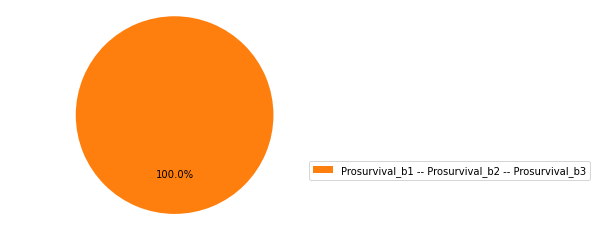

In [9]:
res.plot_piechart()

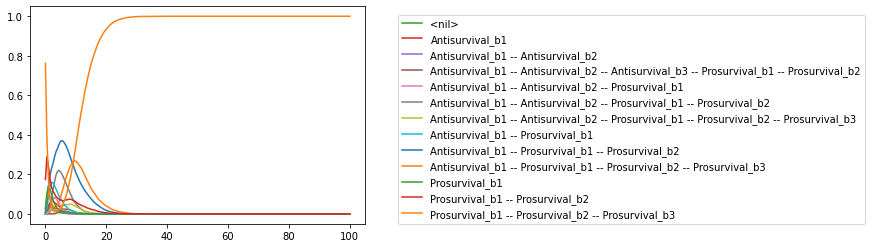

In [10]:
wt_trj = res.plot_trajectory(until=100)

The model is developed to simulate actively growing AGS cells. The probability to reach prosurvival was therefore expected to be 100%. 

# Study of Drug Responses 

Drug responses for five inhibitors were studied. The inhibitiors were retrieved from the article by Flobak et al. published in 2015. To simulate drug responses nodes were mutated according to the inhibitor's target profile and before calculating the probability to reach prosurvival and antisurvival. Different target profiles were tested by incrasing the threshold for binding affinity from 10 nM, 100 nM, 1 uM to 10 uM. The profiles were rewritten to only include nodes from the gin sim network retrieved from Flobak et al. 

The cell growth can be scaled from +3 to -3. The growth sum is calculated form the state of the output nodes. 

# CASCADE 1

## (5Z)-7-oxozeaenol (CHEMBL1077979)

### Flobak

In [11]:
chembl1077979_sim = sim.copy()

chembl1077979_sim.mutate("TAK1", "OFF")

In [12]:
chembl1077979_res = chembl1077979_sim.run()

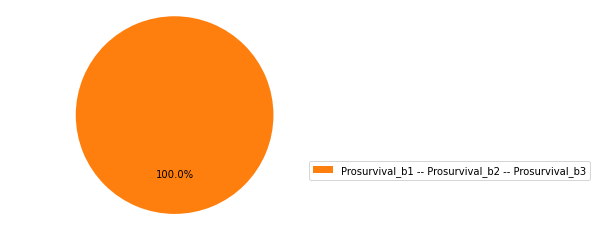

In [13]:
chembl1077979_res.plot_piechart()

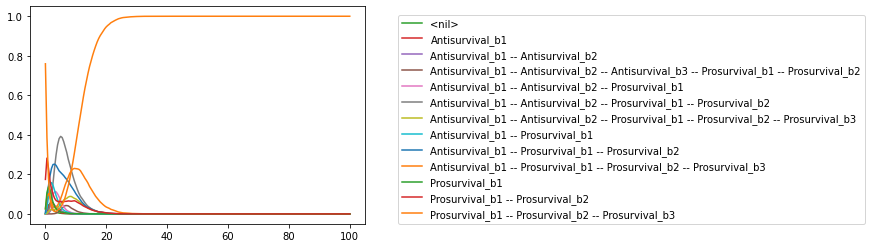

In [14]:
chembl1077979_trj = chembl1077979_res.plot_trajectory(until=100) 

In [15]:
biolqm_chembl1077979 = maboss.to_biolqm(chembl1077979_sim)

fixpoints_chembl1077979 = biolqm.fixpoints(biolqm_model)

tabulate(fixpoints_chembl1077979)

,MEK,p38alpha,RTPKgene,MMP,RTPK,PTEN,SHC1,GRB2,ERK,SOS,SHP2,Ras,AKT,Rheb,Raf,MAP3K8,DUSP6,mTORC1,TAB,TAK1,ASK1,MKK3,DUSP1,MKK4,MSK,MEKK4,MLK3,GRAP2,MKK7,Rac,mTORC2,Dvl,JNK,GAB,p53,IKKB,IKKA,PDK1,S6K,IRS1,CFLAR,Caspase8,Egr1,PTENgene,CytochromeC,Caspase9,NLK,FOXO,GSK3,RSK,TSC,pras40,BAD,BCL2,MDM2,NFkB,MDM2gene,BAX,PI3K,DKK1,Fz,LRP,ITCH,DKK1gene,SFRP1,Antisurvival_b1,Caspase37_b1,Antisurvival_b2,Caspase37_b2,Antisurvival_b3,Axin,CK1,SFRP1gene,cMYC,betaTrCP,betacatenin,LEF,TCF,Prosurvival_b1,CCND1_b1,Prosurvival_b2,CCND1_b2,Prosurvival_b3
0,1,0,0,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1


100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

### Binding Affinity Target Profiles

The probability reach prosurvival and antisurvival is than calculated using target profiles determined from binding affinity values. 

In [16]:
chembl1077979_sim_10nM = sim.copy()

chembl1077979_sim_10nM.mutate("TAK1", "OFF") #MAP3K7
chembl1077979_sim_10nM.mutate("MEK", "OFF") #MAP2K1

chembl1077979_10nM_res = chembl1077979_sim_10nM.run()

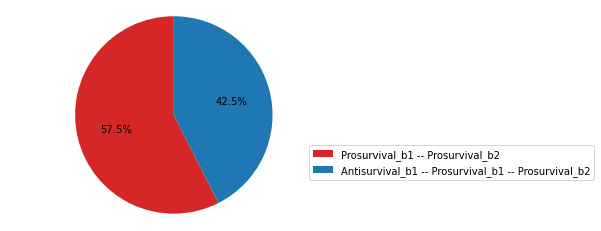

In [17]:
chembl1077979_10nM_res.plot_piechart() 

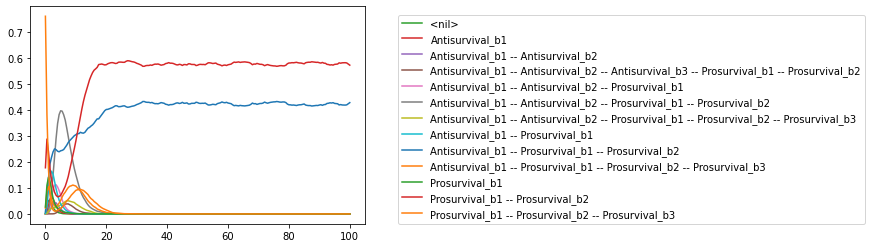

In [18]:
chembl1077979_10nM_trj = chembl1077979_10nM_res.plot_trajectory(until=100)

In [19]:
biolqm_chembl1077979_10nM = maboss.to_biolqm(chembl1077979_sim_10nM)

fixpoints_chembl1077979_10nM = biolqm.fixpoints(biolqm_chembl1077979_10nM)

tabulate(fixpoints_chembl1077979_10nM)

""


57.5%: Antisurvival = 0, Prosurvival = 2. **Growth sum: +2** \
42.5%: Antisurvival = 1, Prosurvival = 2. **Growth sum: +1**

When the binding affinity threshold is raised to 100 PLAA becomes a part of the target profile. This gene is not included in the network. For this reason, no simulations were preformed for 100 um.

In [20]:
chembl1077979_sim_1uM = sim.copy()

chembl1077979_sim_1uM.mutate("TAK1", "OFF") #MAP3K7
chembl1077979_sim_1uM.mutate("MEK", "OFF") #MAP2K1
chembl1077979_sim_1uM.mutate("ERK", "OFF") #MAPK1

chembl1077979_1uM_res = chembl1077979_sim_1uM.run()

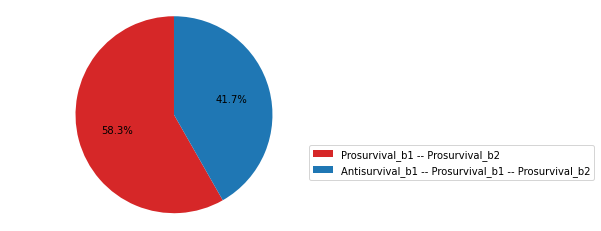

In [21]:
chembl1077979_1uM_res.plot_piechart()

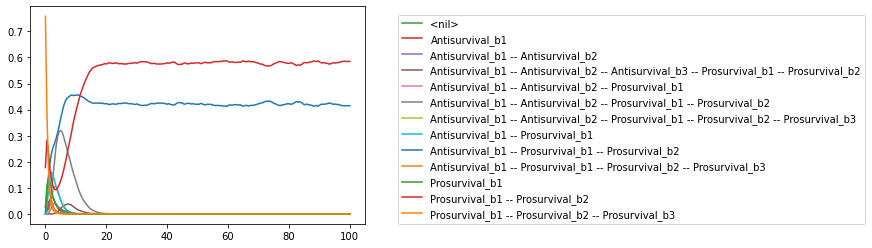

In [22]:
chembl1077979_1uM_trj = chembl1077979_1uM_res.plot_trajectory(until=100)

58.3%: Antisurvival = 0, Prosurvival = 2. **Growth sum: +2** \
41.7%: Antisurvival = 1, Prosurvival = 2. **Growth sum: +1**

In [24]:
chembl1077979_sim_10uM = sim.copy()

chembl1077979_sim_10uM.mutate("TAK1", "OFF") #MAP3K7
chembl1077979_sim_10uM.mutate("MEK", "OFF")
chembl1077979_sim_10uM.mutate("ERK", "OFF")
chembl1077979_sim_10uM.mutate("MKK7", "OFF")

chembl1077979_10uM_res = chembl1077979_sim_10uM.run()

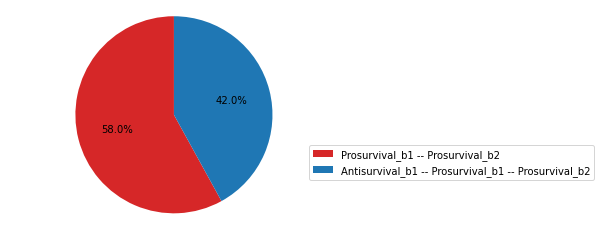

In [25]:
chembl1077979_10uM_res.plot_piechart()

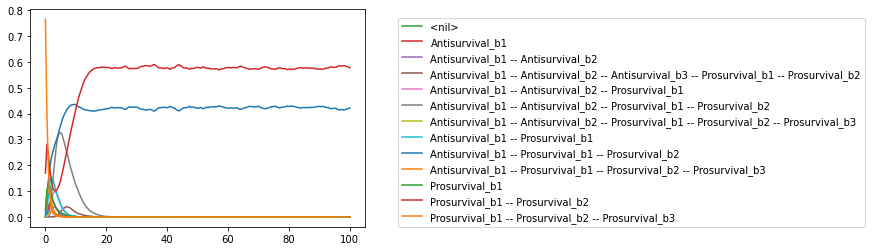

In [26]:
chembl1077979_10uM_trj = chembl1077979_10uM_res.plot_trajectory(until=100)

58.0%: Antisurvival = 0, Prosurvival = 2. **Growth sum: +2** \
42.0%: Antisurvival = 1, Prosurvival = 2. **Growth sum: +1**

## AKTi-1,2 (AKT inhibitor VIII) (CHEMBL258844)

### Flobak

In [10]:
chembl258844_sim = sim.copy()

chembl258844_sim.mutate("AKT", "OFF")

chembl258844_res = chembl258844_sim.run()

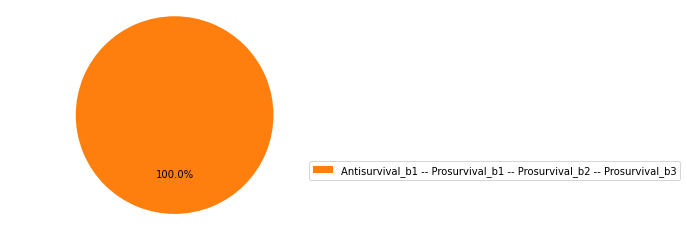

In [11]:
chembl258844_res.plot_piechart()

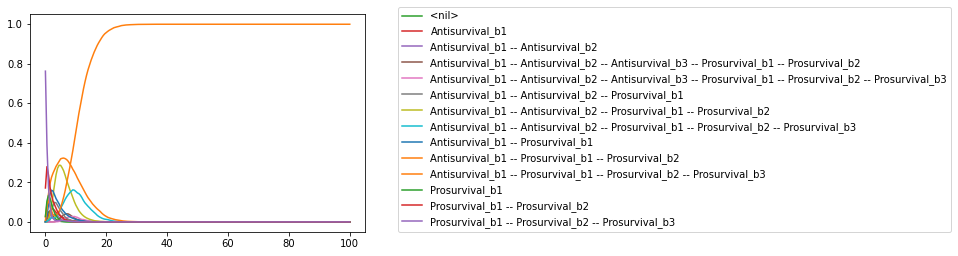

In [12]:
chembl258844_trj = chembl258844_res.plot_trajectory(until=100)

100%: Antisurvival = 1, Prosurvival = 3. **Growth sum: +2**

### Binding Affinity Target Profiles

The probability reach prosurvival and antisurvival is than calculated using target profiles determined from binding affinity values. 

In [13]:
chembl258844_10nM_sim = sim.copy()

chembl258844_10nM_sim.mutate("AKT", "OFF")

chembl258844_10nM_res = chembl258844_10nM_sim.run()

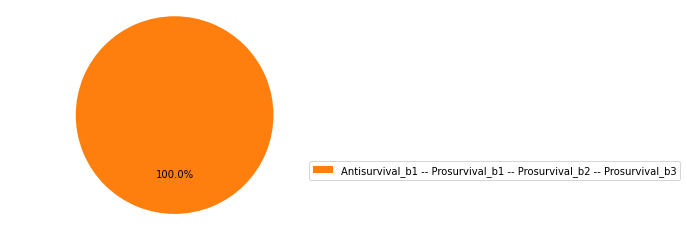

In [14]:
chembl258844_10nM_res.plot_piechart()

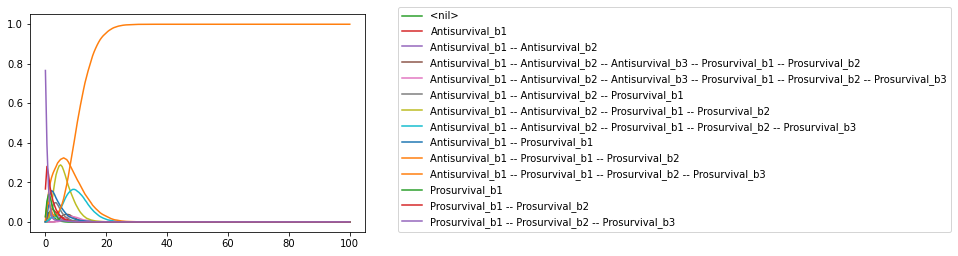

In [15]:
chembl258844_10nM_trj = chembl258844_10nM_res.plot_trajectory(until=100)

100%: Antisurvival = 1, Prosurvival = 3. **Growth sum: +2**

## BIRB0796 (CHEMBL103667)

### Flobak

In [27]:
chembl103667_sim = sim.copy()

chembl103667_sim.mutate("p38alpha", "OFF")

chembl103667_sim.res = chembl103667_sim.run()

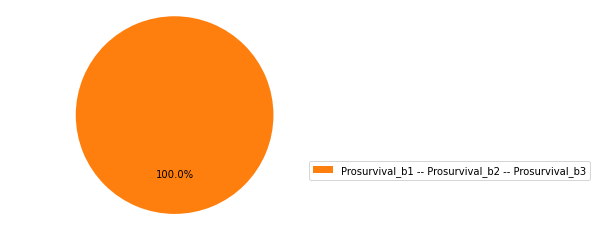

In [28]:
chembl103667_res.plot_piechart()

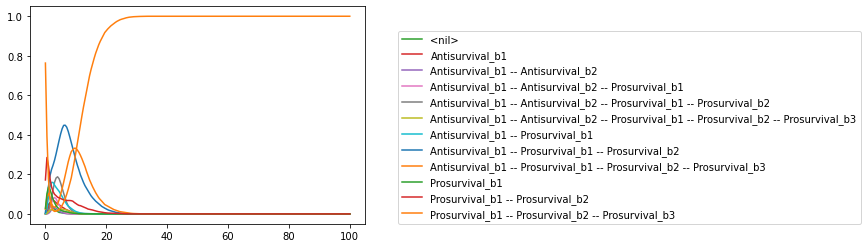

In [29]:
chembl103667_trj = chembl103667_res.plot_trajectory(until=100) 

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

### Binding Affinity Target Profiles

The probability reach prosurvival and antisurvival is than calculated using target profiles determined from binding affinity values. 

In [30]:
chembl103667_sim_10nM = sim.copy()

chembl103667_sim_10nM.mutate("p38alpha", "OFF") #MAPK11, MAPK12, MAPK14
chembl103667_sim_10nM.mutate("JNK", "OFF") #MAPK9

chembl103667_10nM_res = chembl103667_sim_10nM.run()

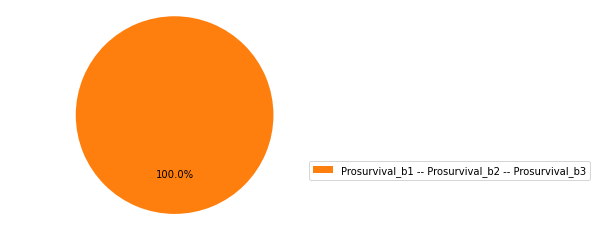

In [31]:
chembl103667_10nM_res.plot_piechart()

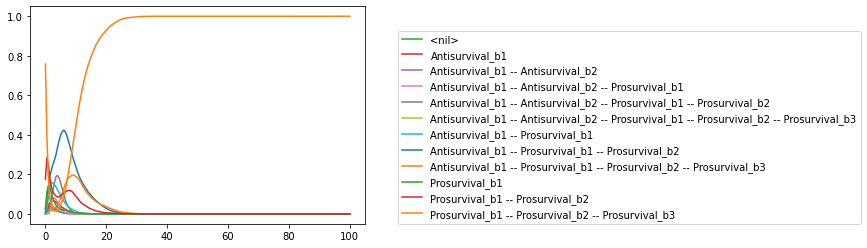

In [32]:
chembl103667_10nM_trj = chembl103667_10nM_res.plot_trajectory(until=100) 

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

In [33]:
chembl103667_sim_100nM = sim.copy()

chembl103667_sim_100nM.mutate("p38alpha", "OFF") #MAPK11, MAPK12, MAPK13, MAPK14
chembl103667_sim_100nM.mutate("JNK", "OFF") #MAPK9, MAPK10
chembl103667_sim_100nM.mutate("Raf", "OFF") 

chembl103667_100nM_res = chembl103667_sim_100nM.run()

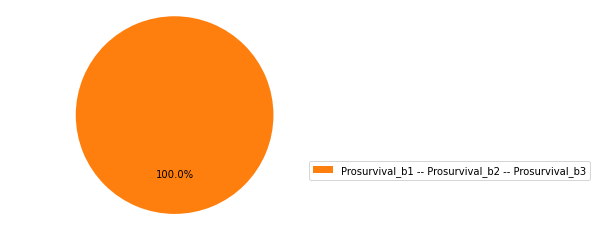

In [34]:
chembl103667_100nM_res.plot_piechart()

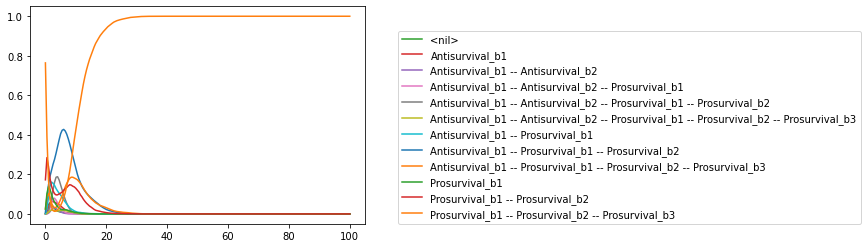

In [35]:
chembl103667_100nM_trj = chembl103667_100nM_res.plot_trajectory(until=100) 

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

In [36]:
chembl103667_sim_1uM = sim.copy()

chembl103667_sim_1uM.mutate("p38alpha", "OFF") #MAPK11, MAPK12, MAPK13, MAPK14
chembl103667_sim_1uM.mutate("JNK", "OFF") #MAPK8, MAPK9, MAPK10
chembl103667_sim_1uM.mutate("TAK1", "OFF") #MAP3K7
chembl103667_sim_1uM.mutate("NLK", "OFF")
chembl103667_sim_1uM.mutate("RTPK", "OFF")
chembl103667_sim_1uM.mutate("Raf", "OFF")

chembl103667_1uM_res = chembl103667_sim_1uM.run()

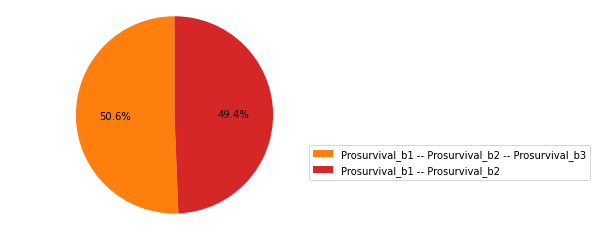

In [37]:
chembl103667_1uM_res.plot_piechart()

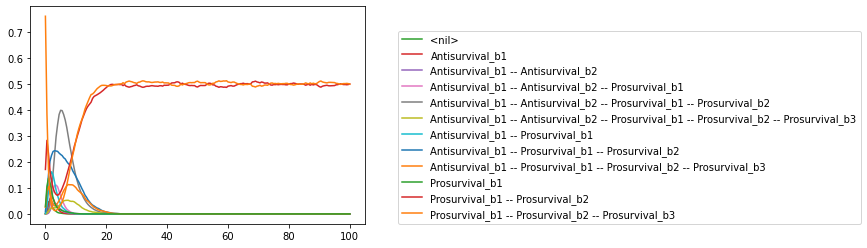

In [38]:
chembl103667_1uM_trj = chembl103667_1uM_res.plot_trajectory(until=100) 

49.6%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3** \
49.6%: Antisurvival = 0, Prosurvival = 2. **Growth sum: +2**

In [39]:
chembl103667_sim_10uM = sim.copy()

chembl103667_sim_10uM.mutate("p38alpha", "OFF") # MAPK14 (MAPK11, MAPK12, MAPK13 of p38)
chembl103667_sim_10uM.mutate("JNK", "OFF") #MAPK8, MAPK9, MAPK10
chembl103667_sim_10uM.mutate("TAK1", "OFF") #MAP3K7
chembl103667_sim_10uM.mutate("NLK", "OFF")
chembl103667_sim_10uM.mutate("ERK", "OFF") #MAPK1
chembl103667_sim_10uM.mutate("Raf", "OFF") #RAF1
chembl103667_sim_10uM.mutate("RTPK", "OFF") #RAF1

chembl103667_10uM_res = chembl103667_sim_10uM.run()

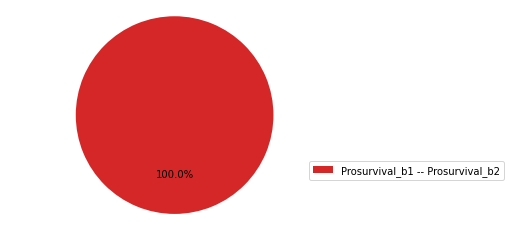

In [40]:
chembl103667_10uM_res.plot_piechart()

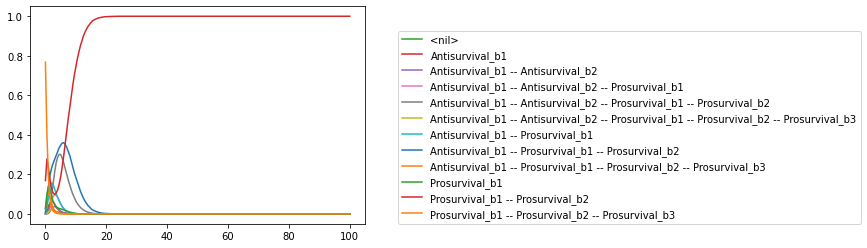

In [41]:
chembl103667_10uM_trj = chembl103667_10uM_res.plot_trajectory(until=100) 

100%: Antisurvival = 0, Prosurvival = 2. **Growth sum: +2**

## CT99021 (CHEMBL412142)

### Flobak

In [42]:
chembl412142_sim = sim.copy()

chembl412142_sim.mutate("GSK3", "OFF") # GSK3A, GSK3B

chembl412142_res = chembl412142_sim.run()

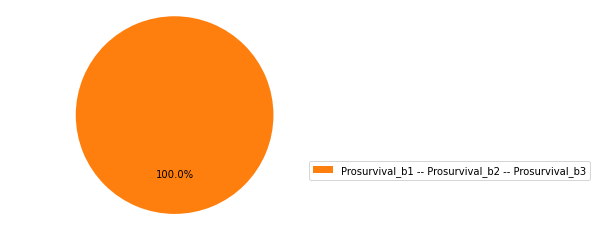

In [43]:
chembl412142_res.plot_piechart() 

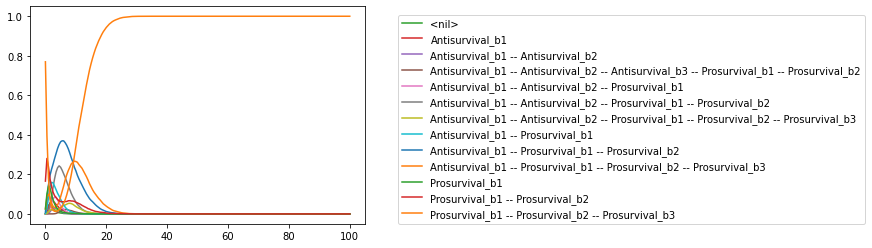

In [44]:
chembl412142_trj = chembl412142_res.plot_trajectory(until=100) 

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

### Binding Affinity Target Profiles

The probability reach prosurvival and antisurvival is than calculated using target profiles determined from binding affinity values. 

The target profile remained unchanged when increasing the binding affinity threshold. 

Looking at the fixpoints calculated for cancer cells were prosurvival initially is set to be 1 GSK3 is observed to be zero. Turning the this node off is therefore assumed to have small effect. 

In [45]:
chembl412142_sim_10nM = sim.copy()

chembl412142_sim_10nM.mutate("GSK3", "OFF") #MAPK11, MAPK12, MAPK14

chembl412142_10nM_res = chembl412142_sim_10nM.run()

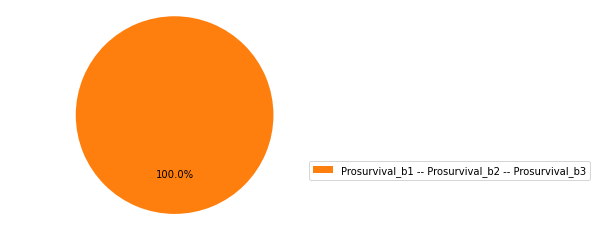

In [46]:
chembl412142_10nM_res.plot_piechart() 

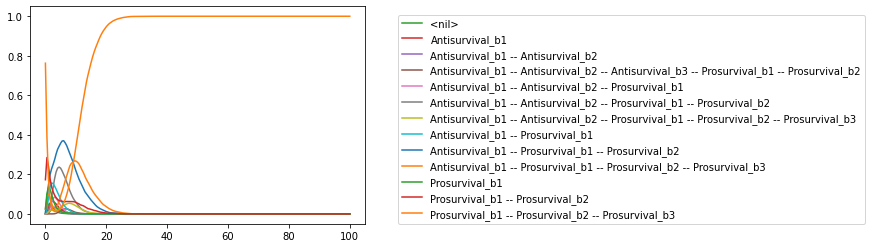

In [47]:
chembl412142_10nM_trj = chembl412142_10nM_res.plot_trajectory(until=100) 

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

## PD0325901 (CHEMBL507361)

### Flobak

In [48]:
chembl507361_sim = sim.copy()

chembl507361_sim.mutate("MEK", "OFF") #MAP2K1

chembl507361_res = chembl507361_sim.run()

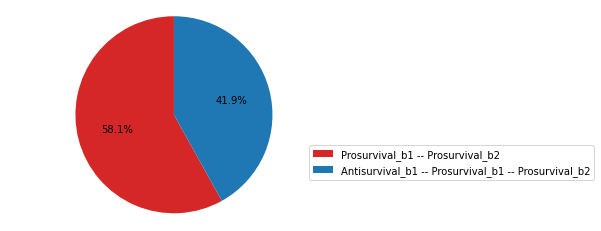

In [49]:
chembl507361_res.plot_piechart()

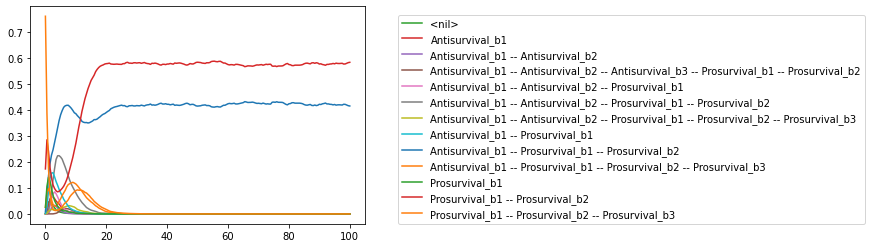

In [50]:
chembl412142_trj = chembl507361_res.plot_trajectory(until=100) 

100%: Antisurvival = 1, Prosurvival = 2. **Growth sum: +1**

### Binding Affinity Target Profiles

The probability reach prosurvival and antisurvival is than calculated using target profiles determined from binding affinity values. 

Look into MAPK/ERK pathway!! 

In [51]:
chembl507361_sim_10nM = sim.copy()

chembl507361_sim_10nM.mutate("Raf", "OFF")
chembl507361_sim_10nM.mutate("MEK", "OFF") #MAP2K1

chembl507361_10nM_res = chembl507361_sim_10nM.run()

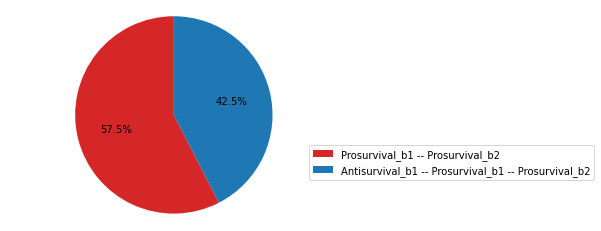

In [52]:
chembl507361_10nM_res.plot_piechart()

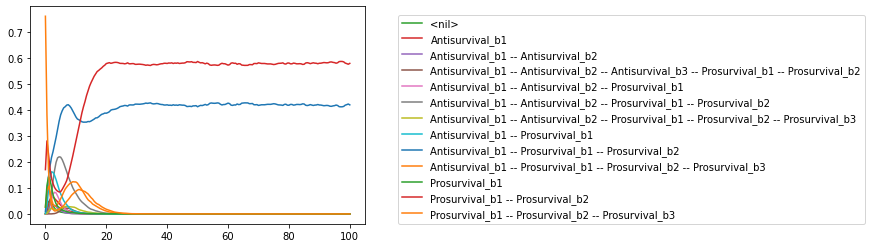

In [53]:
chembl412142_10nM_trj = chembl507361_10nM_res.plot_trajectory(until=100) 

57.7%: Antisurvival = 0, Prosurvival = 2. **Growth sum: +2** \
42.3%: Antisurvival = 1, Prosurvival = 2. **Growth sum: +1**

MAP2K2 is included in the target profile when the threshold is increased from 100 uM to 1 mM. MAP2K2 is part of the MEK family represented by the MEK node. Hence, no new mutation is introduced. 

In [54]:
chembl507361_sim_100nM = sim.copy()

chembl507361_sim_100nM.mutate("MEK", "OFF") #MAP2K1, MAP2K2
chembl507361_sim_100nM.mutate("ERK", "OFF") #MAPK1
chembl507361_sim_100nM.mutate("Raf", "OFF")

chembl507361_100nM_res = chembl507361_sim_100nM.run()

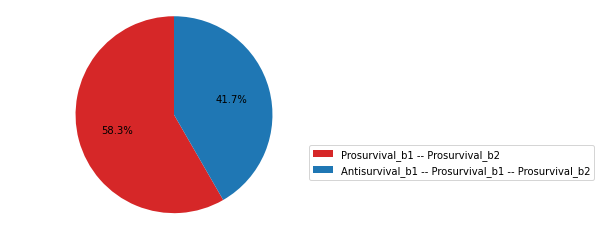

In [55]:
chembl507361_100nM_res.plot_piechart()

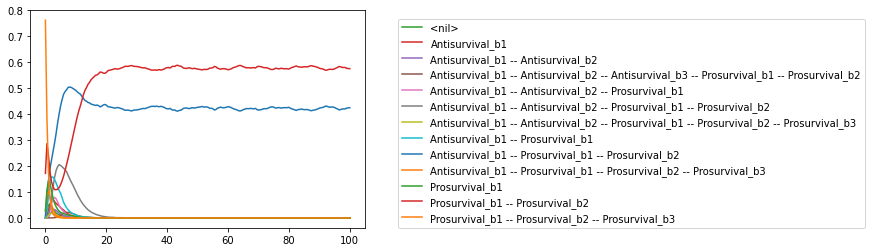

In [56]:
chembl507361_100nM_trj = chembl507361_100nM_res.plot_trajectory(until=100)

57.5%: Antisurvival = 0, Prosurvival = 2. **Growth sum: +2** \
42.5%: Antisurvival = 1, Prosurvival = 2. **Growth sum: +1**

## PI103 (CHEMBL573339)

### Flobak

In [57]:
chembl573339_sim = sim.copy()

chembl573339_sim.mutate("PI3K", "OFF") #PIK3CA

chembl573339_res = chembl573339_sim.run()

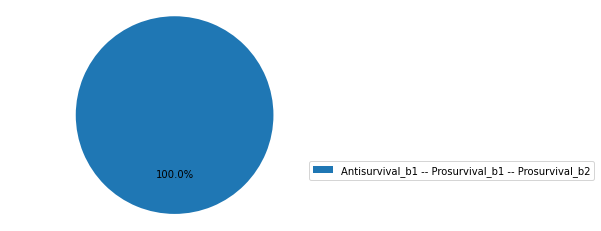

In [58]:
chembl573339_res.plot_piechart()

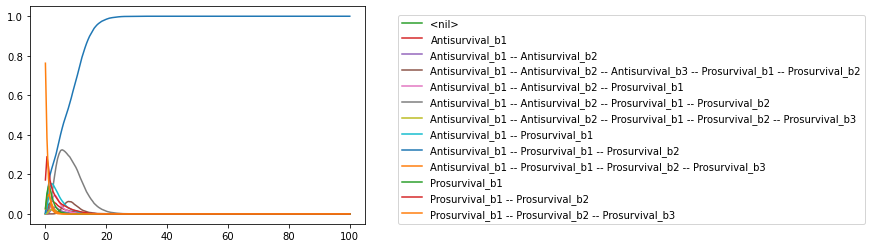

In [59]:
chembl573339_trj = chembl573339_res.plot_trajectory(until=100) 

100%: Antisurvival = 1, Prosurvival = 2. **Growth sum: +1**

### Binding Affinity Target Profiles

The probability reach prosurvival and antisurvival is than calculated using target profiles determined from binding affinity values. 

In [60]:
chembl573339_10nM_sim = sim.copy()

chembl573339_10nM_sim.mutate("PI3K", "OFF") 
chembl573339_10nM_sim.mutate("mTORC1", "OFF") 
chembl573339_10nM_sim.mutate("mTORC2", "OFF") 

chembl573339_10nM_res = chembl573339_10nM_sim.run()

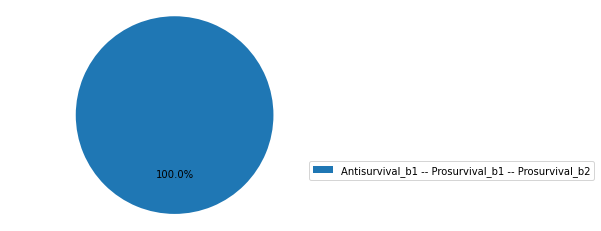

In [61]:
chembl573339_10nM_res.plot_piechart()

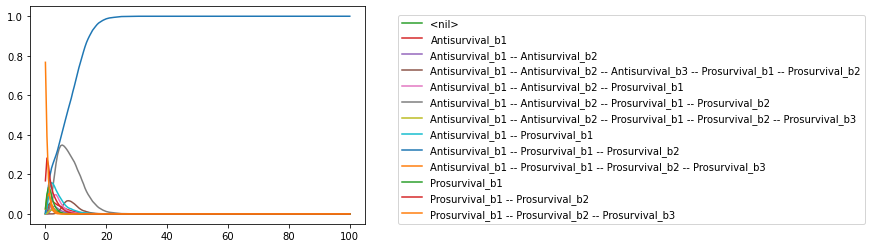

In [62]:
chembl573339_10nM_trj = chembl573339_10nM_res.plot_trajectory(until=100) 

100%: Antisurvival = 1, Prosurvival = 2. **Growth sum: +1**

There is no change in the target profile before the threshold is raised to 10 mM. 

In [140]:
chembl573339_10uM_sim = sim.copy()

chembl573339_10uM_sim.mutate("PI3K", "OFF")
chembl573339_10uM_sim.mutate("mTORC1", "OFF")
chembl573339_10nM_sim.mutate("mTORC2", "OFF")
chembl573339_10uM_sim.mutate("Raf", "OFF")
chembl573339_10uM_sim.mutate("IKKA", "OFF") 
chembl573339_10uM_sim.mutate("RTPK", "OFF")

chembl573339_10uM_res = chembl573339_10uM_sim.run()

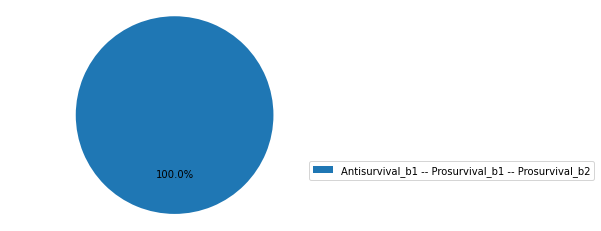

In [141]:
chembl573339_10uM_res.plot_piechart()

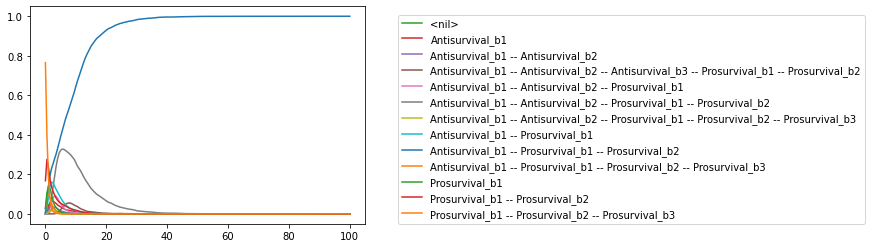

In [142]:
chembl573339_10uM_trj = chembl573339_10uM_res.plot_trajectory(until=100) 

100%: Antisurvival = 1, Prosurvival = 2. **Growth sum: +1**

## PKF118-310 (CHEMBL578512)

### Flobak

In [66]:
chembl578512_sim = sim.copy()

chembl578512_sim.mutate("betacatenin", "OFF") #CTNNB1

chembl578512_res = chembl578512_sim.run()

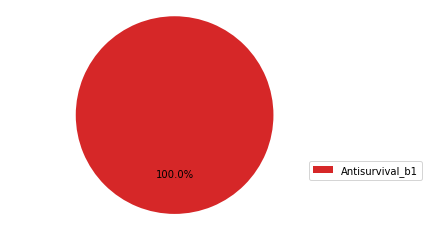

In [67]:
chembl578512_res.plot_piechart()

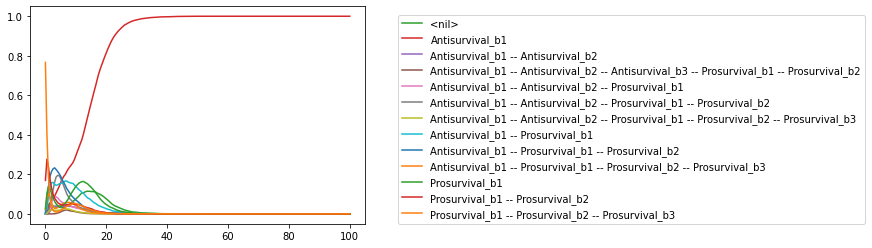

In [68]:
chembl578512_trj = chembl578512_res.plot_trajectory(until=100) 

100%: Antisurvival = 1, Prosurvival = 0. **Growth sum: -1**

### Binding Affinity Target Profiles

The probability reach prosurvival and antisurvival is than calculated using target profiles determined from binding affinity values. 

In [69]:
chembl578512_1uM_sim = sim.copy()

chembl578512_1uM_sim.mutate("DUSP1", "OFF") 

chembl578512_1uM_res = chembl578512_1uM_sim.run()

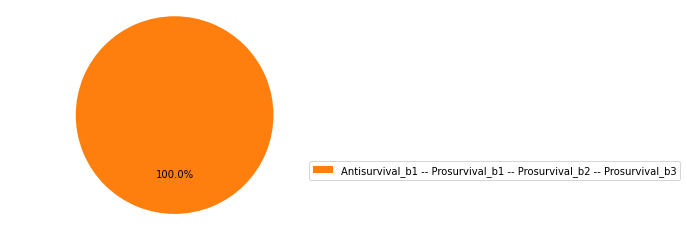

In [70]:
chembl578512_1uM_res.plot_piechart()

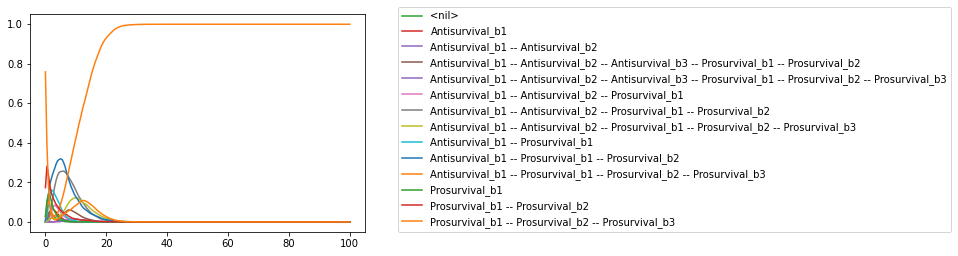

In [71]:
chembl578512_1uM_trj = chembl578512_1uM_res.plot_trajectory(until=100) 

100%: Antisurvival = 1, Prosurvival = 3. **Growth sum: 2**

In [72]:
chembl578512_10uM_sim = sim.copy()

chembl578512_10uM_sim.mutate("DUSP1", "OFF") 
chembl578512_10uM_sim.mutate("TCF", "OFF") 
chembl578512_10uM_sim.mutate("betacatenin", "OFF") 

chembl578512_10uM_res = chembl578512_10uM_sim.run()

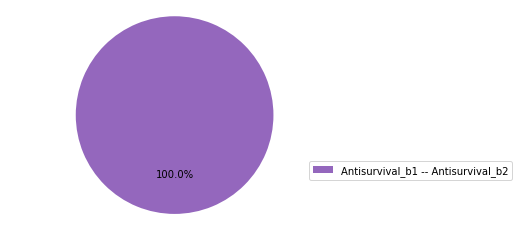

In [73]:
chembl578512_10uM_res.plot_piechart()

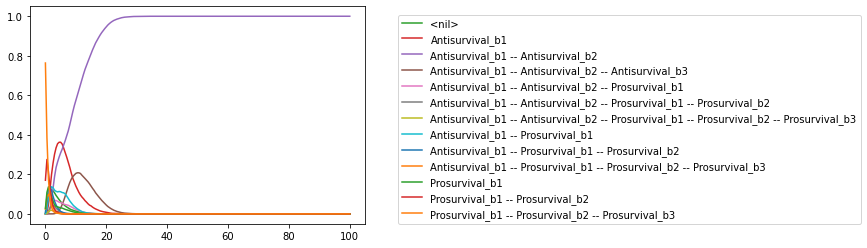

In [74]:
chembl578512_10uM_trj = chembl578512_10uM_res.plot_trajectory(until=100) 

100%: Antisurvival = 2, Prosurvival = 0. **Growth sum: -2**

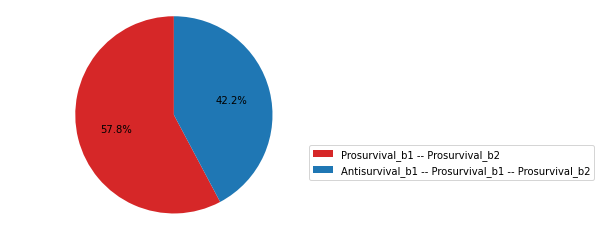

In [75]:
ERK_sim = sim.copy()

ERK_sim.mutate("ERK", "OFF") 

ERK_res = ERK_sim.run()

ERK_res.plot_piechart()

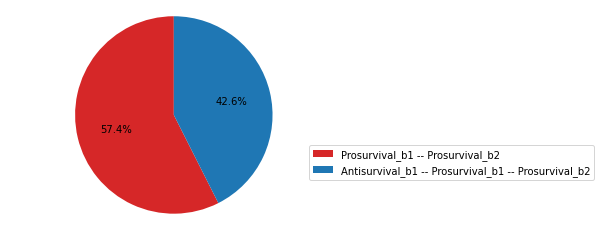

In [76]:
MEK_sim = sim.copy()

MEK_sim.mutate("MEK", "OFF") 

MEK_res = MEK_sim.run()

MEK_res.plot_piechart()

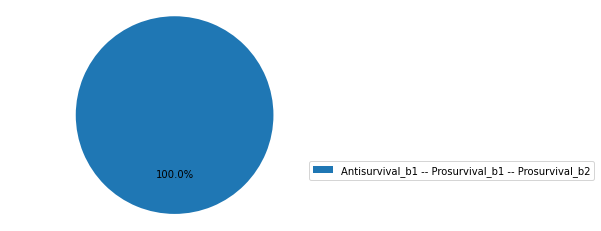

In [77]:
PIK3CA_sim = sim.copy()

PIK3CA_sim.mutate("PI3K", "OFF") 

PIK3CA_res = PIK3CA_sim.run()

PIK3CA_res.plot_piechart()

## Questions

- Can the results tell us anything about how influential a node is? (TAK1 and NLK compared to ERK and RAF)

# CASCADE 2.0

In [17]:
cas_2 = ginsim.load("/tmp/colomotofxo3wetp_AGS_literature-informed.zginml")

In [79]:
ginsim.show(cas_2)

In [80]:
# Concevert the network to a pint model

cas_2_pint = ginsim.to_pint(cas_2)

cas_2_pint.summary()

{'nb_automata': 144,
 'nb_local_states': 292,
 'max_local_states': 4,
 'nb_transitions': 577,
 'nb_states': 89202980794122492566142873090593446023921664}

# Stochastic Boolean Modeling 

In [18]:
# Convert the bioLQM model to MaBoSS format

cas_2_sim = ginsim.to_maboss(cas_2)

# Set initial states isstate 
# The propability for prosurvival to be 0 is 0, consecuently, it is a 100% probability for these nodes to be active in the begining. 

cas_2_sim.network.set_istate("Prosurvival_b1", [0, 1]) # Prosurvival_b1 is active
cas_2_sim.network.set_istate("Prosurvival_b2", [0, 1]) # Prosurvival_b2 is active
cas_2_sim.network.set_istate("Prosurvival_b3", [0, 1]) # Prosurvival_b3 is active

cas_2_sim.get_initial_state() # Verify initial state

Warning, node Prosurvival_b1 was previously bound to other nodes


{'SRC': 0,
 'CSK': 0,
 'CHUK': 0,
 'RAC_f': 0,
 'DUSP1': 0,
 'TGFBR2': 0,
 'ILR_f': 0,
 'SYK': 0,
 'IRAK1': 0,
 'SHC1': 0,
 'JAK_f': 0,
 'CBPp300_c': 0,
 'SKP2': 0,
 'TP53': 0,
 'SMAD7': 0,
 'SMAD6': 0,
 'DKK_f': 0,
 'FOXO_f': 0,
 'TCF7_f': 0,
 'DKK_g': 0,
 'MYC': 0,
 'CCND1': 0,
 'EGR1': 0,
 'MMP_f': 0,
 'PTEN_g': 0,
 'RTPK_f': 0,
 'CTNNB1': 0,
 'LEF1': 0,
 'SFRP1': 0,
 'FZD_f': 0,
 'CASP8': 0,
 'REL_f': 0,
 'NFKB_f': 0,
 'DVL_f': 0,
 'LRP_f': 0,
 'BTRC': 0,
 'CK1_f': 0,
 'AXIN1': 0,
 'mTORC2_c': 0,
 'PDPK1': 0,
 'MEK_f': 0,
 'CYCS': 0,
 'CASP9': 0,
 'GSK3_f': 0,
 'IRS1': 0,
 'MDM2': 0,
 'AKT_f': 0,
 'BCL2': 0,
 'RAF_f': 0,
 'mTORC1_c': 0,
 'RHEB': 0,
 'RTPK_g': 0,
 'PTEN': 0,
 'CASP3': 0,
 'PIK3CA': 0,
 'CREBBP': 0,
 'PTPN11': 0,
 'KRAS': 0,
 'MAP2K4': 0,
 'MAP2K7': 0,
 'MAPK14': 0,
 'JNK_f': 0,
 'MAP2K3': 0,
 'ERK_f': 0,
 'LIF': 0,
 'PPP1CA': 0,
 'GAB_f': 0,
 'SOS1': 0,
 'PRKCA': 0,
 'VAV1': 0,
 'PLCG1': 0,
 'PRKCD': 0,
 'RSK_f': 0,
 'S6K_f': 0,
 'PLK1': 0,
 'ILK': 0,
 'SOCS1': 0,
 

In [19]:
# Select output nodes of interest

cas_2_sim.network.set_output(('Prosurvival_b1','Prosurvival_b2', 'Prosurvival_b3', 'Antisurvival_b1', 'Antisurvival_b2', 'Antisurvival_b3'))

In [83]:
cas_2_biolqm = maboss.to_biolqm(cas_2_sim)

fixpoints_cas_2 = biolqm.fixpoints(cas_2_biolqm)

tabulate(fixpoints_cas_2)

,CSK,RTPK_f,SRC,PRKACA,AKT_f,PRKCA,TRAF6,CHUK,DVL_f,mTORC2_c,VAV1,ARHGAP24,TIAM1,RAC_f,Prosurvival_b1,MYC,CCND1,RSK_f,Prosurvival_b2,Prosurvival_b3,SKP2,MAPK14,DUSP1_g,MSK_f,DUSP1,TGFB1,SMURF1,SMURF2,TGFBR2,LIF,AP1_c,ILR_f,SYK,SOCS1,IRAK1,PTEN,TGFBR1,SHC1,PTPN6,JAK_f,TP53,CREBBP,EP300,CBPp300_c,ERK_f,MDM2,PRKCD,PIAS1,AXIN1,SMAD7_g,ITCH,SMAD7,SMAD6_g,SMAD6,DKK_g,DKK_f,CK1_f,NLK,FOXO_f,CTNNB1,TCF7_f,GSK3_f,PLK1,STAT3,EGR1,LEF1,MMP_f,PTEN_g,MEK_f,RTPK_g,BTRC,SFRP1_g,SFRP1,FZD_f,CFLAR,CASP8,STAT1,IKBKB,REL_f,NFKB_f,SMAD1,JNK_f,LRP_f,PPP1CA,PPM1A,PIK3CA,S6K_f,TSC_f,PDPK1,RAF_f,MAP3K8,BCL2,BAX,CYCS,CASP9,IRS1,MDM2_g,MAPKAPK2,ILK,BAD,RHEB,KRAS,AKT1S1,mTORC1_c,Antisurvival_b1,CASP3,ISGF3_c,Antisurvival_b2,Antisurvival_b3,ROCK1,GAB_f,PTPN11,SOS1,GRAP2,MAP3K7,MAP3K11,MAP3K4,MAP2K4,MAPK8IP3,MAP2K7,MAP2K3,PAK1,MAP3K5,DUSP6,GRB2,PLCG1,SOCS1_g,LIMK2,SKI,CFL_f,SRF,STAT2,ACVR1,SMAD2,FOS,JUN,SMAD3,SMAD5,SMAD4,TAB_f,ATF2,BMPR2,CDC42,PARD6A,DAAM1,RND3,RHOA,LIMK1
0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,0,1,1,1,1,0,0,1,1,0,0,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,1


In [84]:
cas_2_res = cas_2_sim.run()

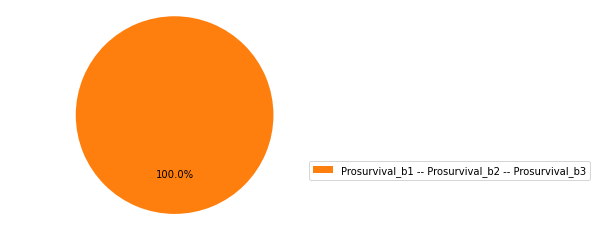

In [85]:
cas_2_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

# (5Z)-7-oxozeaenol (CHEMBL1077979)

## Niederdorfer et al.

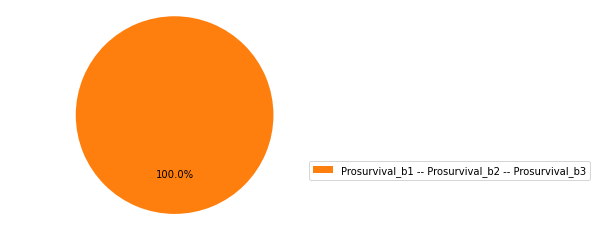

In [86]:
CHEMBL1077979_cas_2_sim = cas_2_sim.copy()

CHEMBL1077979_cas_2_sim.mutate("MAP3K7", "OFF")

CHEMBL1077979_cas_2_res = CHEMBL1077979_cas_2_sim.run()

CHEMBL1077979_cas_2_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

### Target profiles according to Binding Affinity 

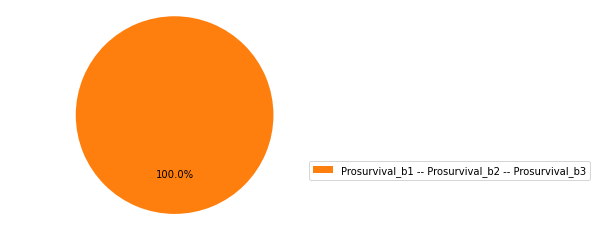

In [87]:
CHEMBL1077979_cas_2_10nM_sim = cas_2_sim.copy()

CHEMBL1077979_cas_2_10nM_sim.mutate("MAP3K7", "OFF")
CHEMBL1077979_cas_2_10nM_sim.mutate("MEK_f", "OFF") #MAP2K1

CHEMBL1077979_cas_2_10nM_res = CHEMBL1077979_cas_2_10nM_sim.run()

CHEMBL1077979_cas_2_10nM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

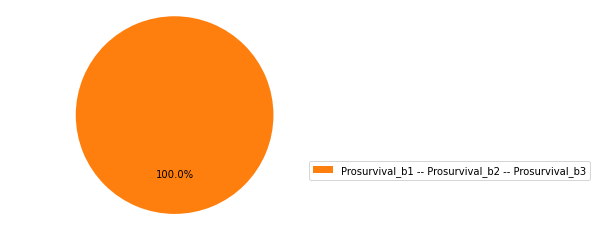

In [88]:
CHEMBL1077979_cas_2_1uM_sim = cas_2_sim.copy()

CHEMBL1077979_cas_2_1uM_sim.mutate("MAP3K7", "OFF")
CHEMBL1077979_cas_2_1uM_sim.mutate("MEK_f", "OFF") #MAP2K1
CHEMBL1077979_cas_2_1uM_sim.mutate("ERK_f", "OFF") #MAP2K1


CHEMBL1077979_cas_2_1uM_res = CHEMBL1077979_cas_2_1uM_sim.run()

CHEMBL1077979_cas_2_1uM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

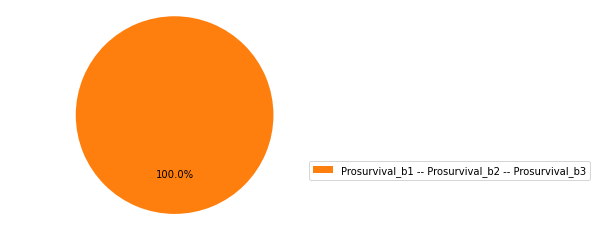

In [89]:
CHEMBL1077979_cas_2_10uM_sim = cas_2_sim.copy()

CHEMBL1077979_cas_2_10uM_sim.mutate("MAP3K7", "OFF")
CHEMBL1077979_cas_2_10uM_sim.mutate("MEK_f", "OFF") #MAP2K1
CHEMBL1077979_cas_2_10uM_sim.mutate("ERK_f", "OFF") #MAPK1
CHEMBL1077979_cas_2_10uM_sim.mutate("MAP2K7", "OFF")

CHEMBL1077979_cas_2_10uM_res = CHEMBL1077979_cas_2_10uM_sim.run()

CHEMBL1077979_cas_2_10uM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

## AKTi-1,2 (AKT inhibitor VIII) (CHEMBL258844)

### Flobak

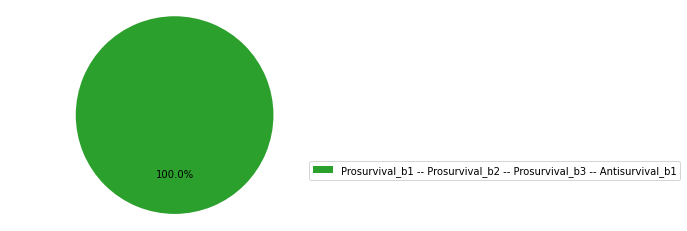

In [22]:
chembl258844_cas_2_sim = cas_2_sim.copy()

chembl258844_cas_2_sim.mutate("AKT_f", "OFF")

chembl258844_cas_2_res = chembl258844_cas_2_sim.run()

chembl258844_cas_2_res.plot_piechart()

100%: Antisurvival = 1, Prosurvival = 3. **Growth sum: +3**

### Target profiles according to Binding Affinity 

In [25]:
chembl258844_cas_2_10nM_sim = cas_2_sim.copy()

chembl258844_cas_2_10nM_sim.mutate("AKT_f", "OFF")

chembl258844_cas_2_10nM_res = chembl258844_cas_2_10nM_sim.run()

100%: Antisurvival = 1, Prosurvival = 3. **Growth sum: +2**

## BIRB0796 (CHEMBL103667)

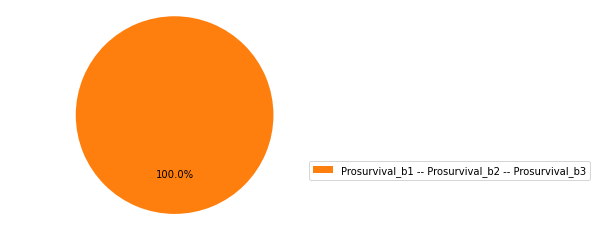

In [90]:
CHEMBL103667_cas_2_sim = cas_2_sim.copy()

CHEMBL103667_cas_2_sim.mutate("MAPK14", "OFF")

CHEMBL103667_cas_2_res = CHEMBL103667_cas_2_sim.run()

CHEMBL103667_cas_2_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

### Target profiles according to Binding Affinity 

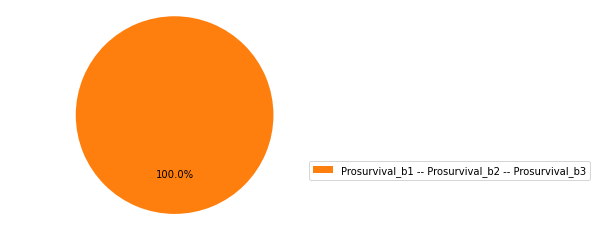

In [91]:
CHEMBL103667_cas_2_10nM_sim = cas_2_sim.copy()

CHEMBL103667_cas_2_10nM_sim.mutate("MAPK14", "OFF")
CHEMBL103667_cas_2_10nM_sim.mutate("JNK_f", "OFF") 

CHEMBL103667_cas_2_10nM_res = CHEMBL103667_cas_2_10nM_sim.run()

CHEMBL103667_cas_2_10nM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

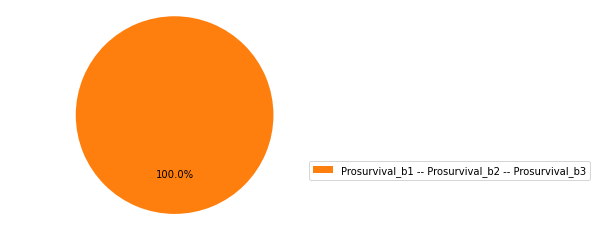

In [92]:
CHEMBL103667_cas_2_100nM_sim = cas_2_sim.copy()

CHEMBL103667_cas_2_100nM_sim.mutate("MAPK14", "OFF")
CHEMBL103667_cas_2_100nM_sim.mutate("JNK_f", "OFF") 
CHEMBL103667_cas_2_100nM_sim.mutate("RAF_f", "OFF")

CHEMBL103667_cas_2_100nM_res = CHEMBL103667_cas_2_100nM_sim.run()

CHEMBL103667_cas_2_100nM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: 3**

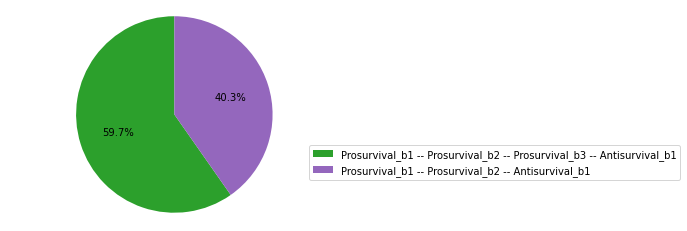

In [93]:
CHEMBL103667_cas_2_1uM_sim = cas_2_sim.copy()

CHEMBL103667_cas_2_1uM_sim.mutate("MAPK14", "OFF")
CHEMBL103667_cas_2_1uM_sim.mutate("JNK_f", "OFF") 
CHEMBL103667_cas_2_1uM_sim.mutate("MAP3K7", "OFF") 
CHEMBL103667_cas_2_1uM_sim.mutate("NLK", "OFF") 
CHEMBL103667_cas_2_1uM_sim.mutate("RAF_f", "OFF") 
CHEMBL103667_cas_2_1uM_sim.mutate("RTPK_f", "OFF") 

CHEMBL103667_cas_2_1uM_res = CHEMBL103667_cas_2_1uM_sim.run()

CHEMBL103667_cas_2_1uM_res.plot_piechart()

59.7%: Antisurvival = 1, Prosurvival = 3. **Growth sum: +2** \
40.3%: Antisurvival = 1, Prosurvival = 2. **Growth sum: +1**

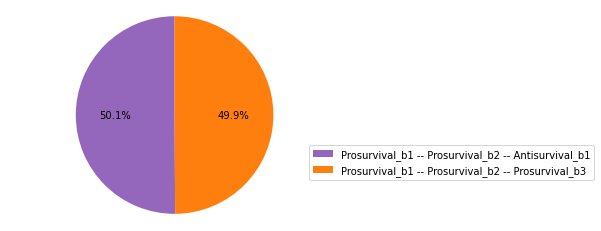

In [94]:
CHEMBL103667_cas_2_10uM_sim = cas_2_sim.copy()

CHEMBL103667_cas_2_10uM_sim.mutate("MAPK14", "OFF")
CHEMBL103667_cas_2_10uM_sim.mutate("JNK_f", "OFF") 
CHEMBL103667_cas_2_10uM_sim.mutate("MAP3K7", "OFF") 
CHEMBL103667_cas_2_10uM_sim.mutate("NLK", "OFF") 
CHEMBL103667_cas_2_10uM_sim.mutate("ERK_f", "OFF") 
CHEMBL103667_cas_2_10uM_sim.mutate("PRKCD", "OFF") 
CHEMBL103667_cas_2_10uM_sim.mutate("RAF_f", "OFF") 
CHEMBL103667_cas_2_10uM_sim.mutate("RTPK_f", "OFF") 

CHEMBL103667_cas_2_10uM_res = CHEMBL103667_cas_2_10uM_sim.run()

CHEMBL103667_cas_2_10uM_res.plot_piechart()

50.1%: Antisurvival = 1, Prosurvival = 2. **Growth sum: +1** \
49.9%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

## CT99021 (CHEMBL412142)

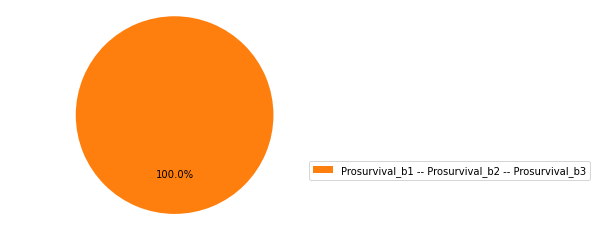

In [95]:
CHEMBL412142_cas_2_sim = cas_2_sim.copy()

CHEMBL412142_cas_2_sim.mutate("GSK3_f", "OFF") #GSK3A, GSK3B

CHEMBL412142_cas_2_res = CHEMBL412142_cas_2_sim.run()

CHEMBL412142_cas_2_res.plot_piechart()

### Target Profiles According to Binding Affinity

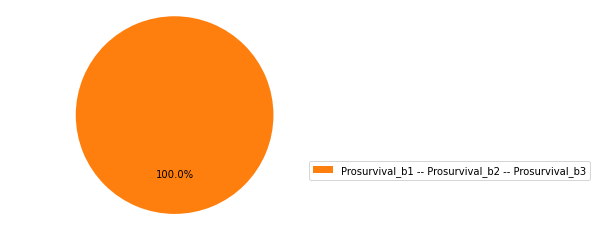

In [96]:
CHEMBL412142_cas_2_10nM_sim = cas_2_sim.copy()

CHEMBL412142_cas_2_10nM_sim.mutate("GSK3_f", "OFF") #GSK3A, GSK3B

CHEMBL412142_cas_2_10nM_res = CHEMBL412142_cas_2_10nM_sim.run()

CHEMBL412142_cas_2_10nM_res.plot_piechart()

## PD0325901 (CHEMBL507361)

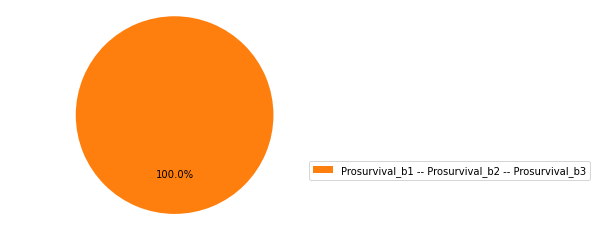

In [97]:
CHEMBL507361_cas_2_sim = cas_2_sim.copy()

CHEMBL507361_cas_2_sim.mutate("MEK_f", "OFF") #MAP2K1, MAP2K2

CHEMBL507361_cas_2_res = CHEMBL507361_cas_2_sim.run()

CHEMBL507361_cas_2_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

### Target profiles according to Binding Affinity 

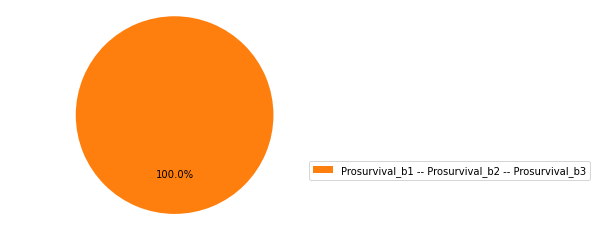

In [98]:
CHEMBL507361_cas_2_10nM_sim = cas_2_sim.copy()

CHEMBL507361_cas_2_10nM_sim.mutate("MEK_f", "OFF")
CHEMBL507361_cas_2_10nM_sim.mutate("RAF_f", "OFF")

CHEMBL507361_cas_2_10nM_res = CHEMBL507361_cas_2_10nM_sim.run()

CHEMBL507361_cas_2_10nM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

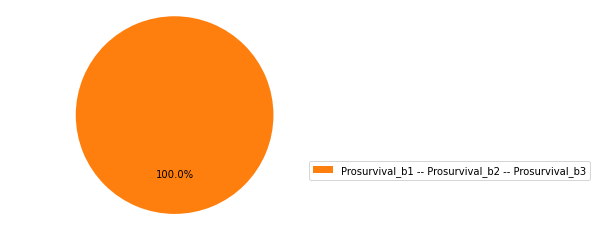

In [99]:
CHEMBL507361_cas_2_100nM_sim = cas_2_sim.copy()

CHEMBL507361_cas_2_100nM_sim.mutate("MEK_f", "OFF")
CHEMBL507361_cas_2_100nM_sim.mutate("RAF_f", "OFF")
CHEMBL507361_cas_2_100nM_sim.mutate("ERK_f", "OFF") 

CHEMBL507361_cas_2_100nM_res = CHEMBL507361_cas_2_100nM_sim.run()

CHEMBL507361_cas_2_100nM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

## PI103 (CHEMBL573339)

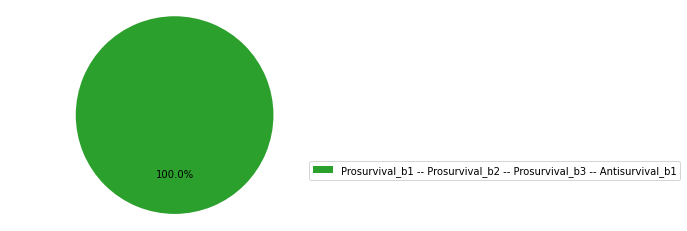

In [100]:
CHEMBL573339_cas_2_sim = cas_2_sim.copy()

CHEMBL573339_cas_2_sim.mutate("PIK3CA", "OFF") 

CHEMBL573339_cas_2_res = CHEMBL573339_cas_2_sim.run()

CHEMBL573339_cas_2_res.plot_piechart()

100%: Antisurvival = 1, Prosurvival = 3. **Growth sum: +2**

### Target profiles According to Binding Affinity 

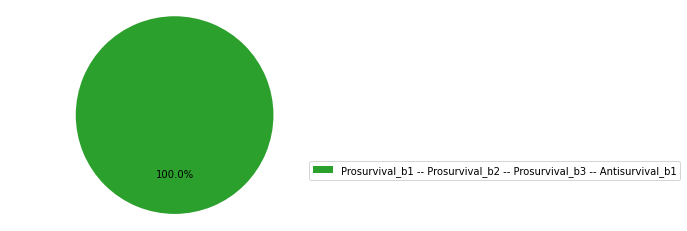

In [101]:
CHEMBL573339_cas_2_10nM_sim = cas_2_sim.copy()

CHEMBL573339_cas_2_10nM_sim.mutate("PIK3CA", "OFF") 
CHEMBL573339_cas_2_10nM_sim.mutate("mTORC1_c", "OFF") 
CHEMBL573339_cas_2_10nM_sim.mutate("mTORC2_c", "OFF") 

CHEMBL573339_cas_2_10nM_res = CHEMBL573339_cas_2_10nM_sim.run()

CHEMBL573339_cas_2_10nM_res.plot_piechart()

100%: Antisurvival = 1, Prosurvival = 3. **Growth sum: +2**

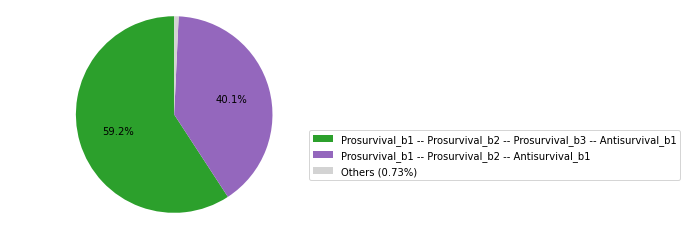

In [102]:
CHEMBL573339_cas_2_10uM_sim = cas_2_sim.copy()

CHEMBL573339_cas_2_10uM_sim.mutate("PIK3CA", "OFF") 
CHEMBL573339_cas_2_10uM_sim.mutate("CHUK", "OFF") 
CHEMBL573339_cas_2_10uM_sim.mutate("JAK_f", "OFF") 
CHEMBL573339_cas_2_10uM_sim.mutate("LIMK2", "OFF") 
CHEMBL573339_cas_2_10uM_sim.mutate("RAF_f", "OFF") 
CHEMBL573339_cas_2_10uM_sim.mutate("RTPK_f", "OFF") 
CHEMBL573339_cas_2_10uM_sim.mutate("mTORC1_c", "OFF") 
CHEMBL573339_cas_2_10uM_sim.mutate("mTORC2_c", "OFF") 

CHEMBL573339_cas_2_10uM_res = CHEMBL573339_cas_2_10uM_sim.run()

CHEMBL573339_cas_2_10uM_res.plot_piechart()

59.2%: Antisurvival = 1, Prosurvival = 3. **Growth sum: +2** \
40.1%: Antisurvival = 1, Prosurvival = 2. **Growth sum: +1**

## PKF118-310 (CHEMBL578512)


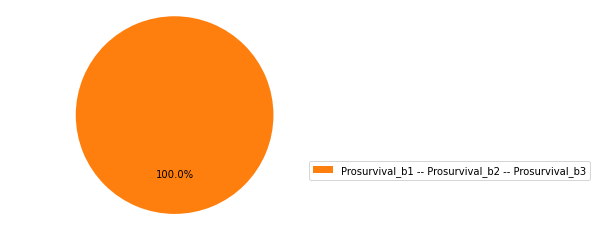

In [103]:
CHEMBL578512_cas_2_sim = cas_2_sim.copy()

CHEMBL578512_cas_2_sim.mutate("CTNNB1", "OFF") 

CHEMBL578512_cas_2_res = CHEMBL578512_cas_2_sim.run()

CHEMBL578512_cas_2_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

### Target profiles according to Binding Affinity 

No interactions below 1 uM. 

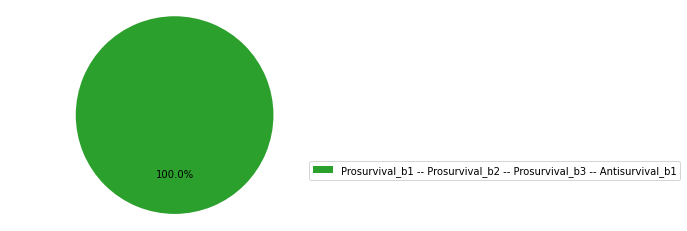

In [104]:
CHEMBL578512_cas_2_1uM_sim = cas_2_sim.copy()

CHEMBL578512_cas_2_1uM_sim.mutate("DUSP1", "OFF") 

CHEMBL578512_cas_2_1uM_res = CHEMBL578512_cas_2_1uM_sim.run()

CHEMBL578512_cas_2_1uM_res.plot_piechart()

100%: Antisurvival = 1, Prosurvival = 3. **Growth sum: +2**

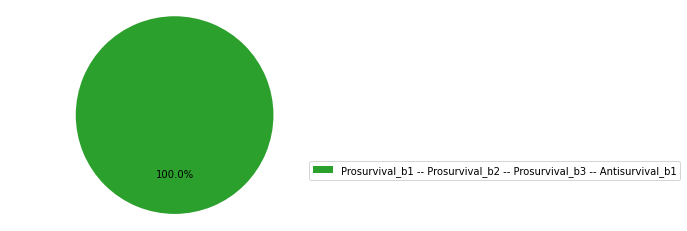

In [105]:
CHEMBL578512_cas_2_10uM_sim = cas_2_sim.copy()

CHEMBL578512_cas_2_10uM_sim.mutate("DUSP1", "OFF") 
CHEMBL578512_cas_2_10uM_sim.mutate("CTNNB1", "OFF") 
CHEMBL578512_cas_2_10uM_sim.mutate("TCF7_f", "OFF") 

CHEMBL578512_cas_2_10uM_res = CHEMBL578512_cas_2_10uM_sim.run()

CHEMBL578512_cas_2_10uM_res.plot_piechart()

100%: Antisurvival = 1, Prosurvival = 3. **Growth sum: +2**

## JNK-IN-8 (JNK Inhibitor XVI) (CHEMBL2216824)

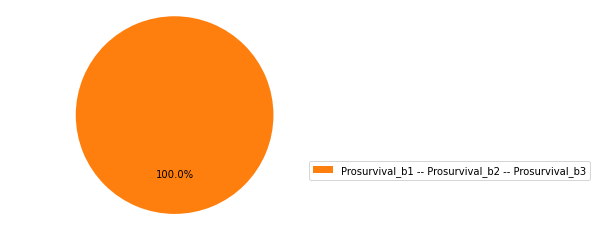

In [106]:
CHEMBL2216824_cas_2_sim = cas_2_sim.copy()

CHEMBL2216824_cas_2_sim.mutate("JNK_f", "OFF") 

CHEMBL2216824_cas_2_res = CHEMBL2216824_cas_2_sim.run()

CHEMBL2216824_cas_2_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

### Target profiles According to Binding Affinity 

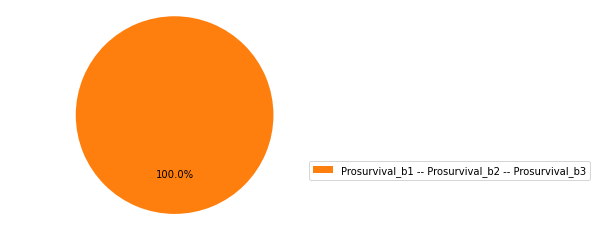

In [107]:
CHEMBL2216824_cas_2_10nM_sim = cas_2_sim.copy()

CHEMBL2216824_cas_2_10nM_sim.mutate("JNK_f", "OFF") 

CHEMBL2216824_cas_2_10nM_res = CHEMBL2216824_cas_2_sim.run()

CHEMBL2216824_cas_2_10nM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

## BI-D1870 (CHEMBL573107)

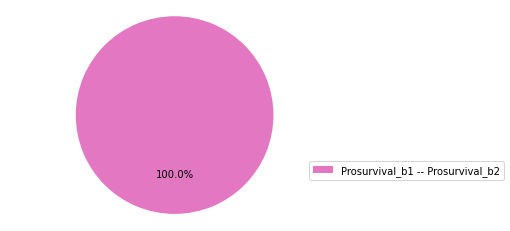

In [108]:
CHEMBL573107_cas_2_sim = cas_2_sim.copy()

CHEMBL573107_cas_2_sim.mutate("RSK_f", "OFF") #RPS6KA1, RPS6KA3, RPS6KA2, RPS6KA6

CHEMBL573107_cas_2_res = CHEMBL573107_cas_2_sim.run()

CHEMBL573107_cas_2_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 2. **Growth sum: +2**

### Target profiles according to Binding Affinity 

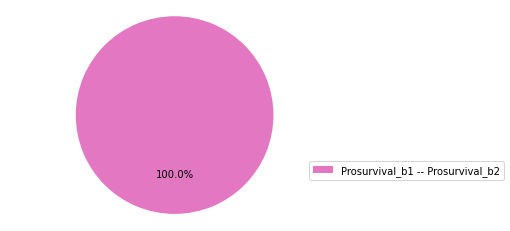

In [109]:
CHEMBL573107_cas_2_10nM_sim = cas_2_sim.copy()

CHEMBL573107_cas_2_10nM_sim.mutate("RSK_f", "OFF") 

CHEMBL573107_cas_2_10nM_res = CHEMBL573107_cas_2_10nM_sim.run()

CHEMBL573107_cas_2_10nM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 2. **Growth sum: +2**

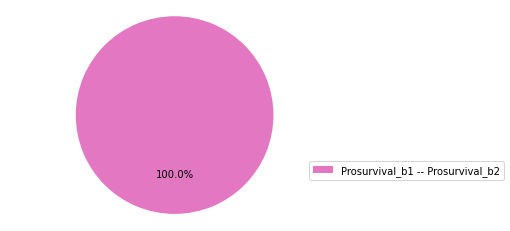

In [110]:
CHEMBL573107_cas_2_100nM_sim = cas_2_sim.copy()

CHEMBL573107_cas_2_100nM_sim.mutate("RSK_f", "OFF") 
CHEMBL573107_cas_2_100nM_sim.mutate("PLK1", "OFF") 

CHEMBL573107_cas_2_100nM_res = CHEMBL573107_cas_2_100nM_sim.run()

CHEMBL573107_cas_2_100nM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 2. **Growth sum: +2**

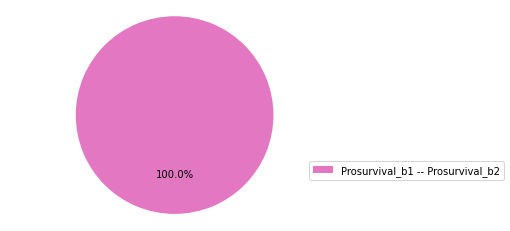

In [111]:
CHEMBL573107_cas_2_1uM_sim = cas_2_sim.copy()

CHEMBL573107_cas_2_1uM_sim.mutate("RSK_f", "OFF") #RPS6KA1, RPS6KA3, RPS6KA2, RPS6KA6
CHEMBL573107_cas_2_1uM_sim.mutate("PLK1", "OFF") 
CHEMBL573107_cas_2_1uM_sim.mutate("CK1_f", "OFF")
CHEMBL573107_cas_2_1uM_sim.mutate("JAK_f", "OFF")

CHEMBL573107_cas_2_1uM_res = CHEMBL573107_cas_2_1uM_sim.run()

CHEMBL573107_cas_2_1uM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 2. **Growth sum: +2**

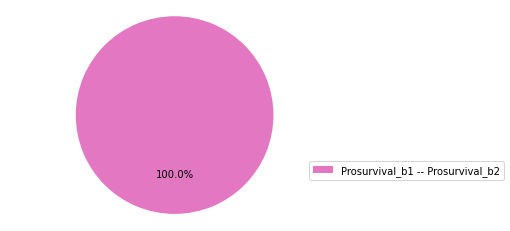

In [112]:
CHEMBL573107_cas_2_10uM_sim = cas_2_sim.copy()

CHEMBL573107_cas_2_10uM_sim.mutate("RSK_f", "OFF") #RPS6KA1, RPS6KA3, RPS6KA2, RPS6KA6
CHEMBL573107_cas_2_10uM_sim.mutate("PLK1", "OFF") 
CHEMBL573107_cas_2_10uM_sim.mutate("CK1_f", "OFF")
CHEMBL573107_cas_2_10uM_sim.mutate("JAK_f", "OFF")
CHEMBL573107_cas_2_10uM_sim.mutate("GSK3_f", "OFF")

CHEMBL573107_cas_2_10uM_res = CHEMBL573107_cas_2_10uM_sim.run()

CHEMBL573107_cas_2_10uM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 2. **Growth sum: +2**

## BI605906 (BIX02514) (CHEMBL4522930)

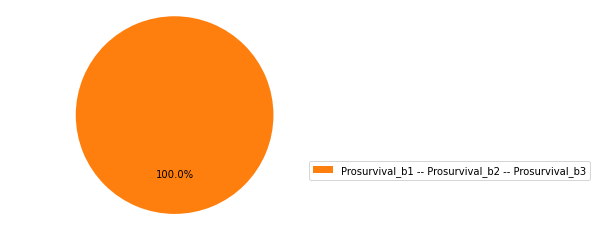

In [113]:
CHEMBL4522930_cas_2_sim = cas_2_sim.copy()

CHEMBL4522930_cas_2_sim.mutate("IKBKB", "OFF")

CHEMBL4522930_cas_2_res = CHEMBL4522930_cas_2_sim.run()

CHEMBL4522930_cas_2_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

## Target Profiles According to Binding Affinity

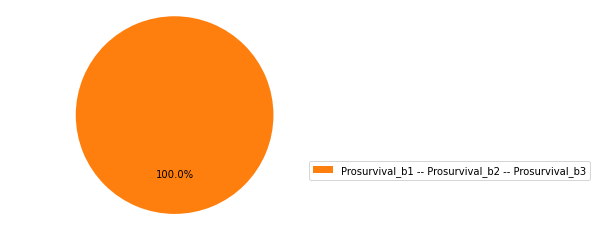

In [114]:
CHEMBL4522930_cas_2_1uM_sim = cas_2_sim.copy()

CHEMBL4522930_cas_2_1uM_sim.mutate("IKBKB", "OFF")

CHEMBL4522930_cas_2_1uM_res = CHEMBL4522930_cas_2_1uM_sim.run()

CHEMBL4522930_cas_2_1uM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

## Ruxolitinib (INCB18424) (CHEMBL1789941)

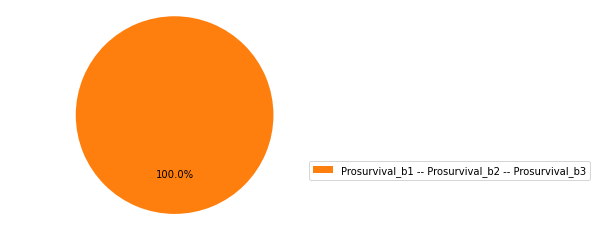

In [115]:
CHEMBL1789941_cas_2_sim = cas_2_sim.copy()

CHEMBL1789941_cas_2_sim.mutate("JAK_f", "OFF") #RPS6KA1, RPS6KA3, RPS6KA2, RPS6KA6

CHEMBL1789941_cas_2_res = CHEMBL1789941_cas_2_sim.run()

CHEMBL1789941_cas_2_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

### Target profiles according to Binding Affinity 

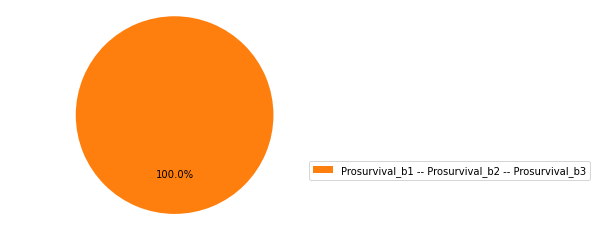

In [116]:
CHEMBL1789941_cas_2_10nM_sim = cas_2_sim.copy()

CHEMBL1789941_cas_2_10nM_sim.mutate("JAK_f", "OFF") 

CHEMBL1789941_cas_2_10nM_res = CHEMBL1789941_cas_2_10nM_sim.run()

CHEMBL1789941_cas_2_10nM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

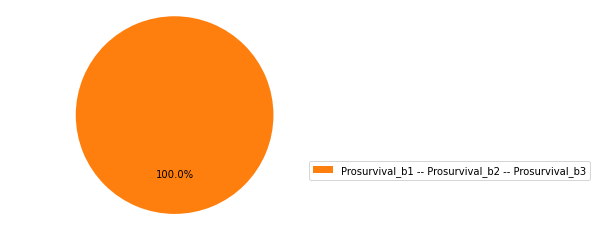

In [117]:
CHEMBL1789941_cas_2_100nM_sim = cas_2_sim.copy()

CHEMBL1789941_cas_2_100nM_sim.mutate("JAK_f", "OFF") 
CHEMBL1789941_cas_2_100nM_sim.mutate("ROCK1", "OFF") #RPS6KA1, RPS6KA3, RPS6KA2, RPS6KA6

CHEMBL1789941_cas_2_100nM_res = CHEMBL1789941_cas_2_100nM_sim.run()

CHEMBL1789941_cas_2_100nM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

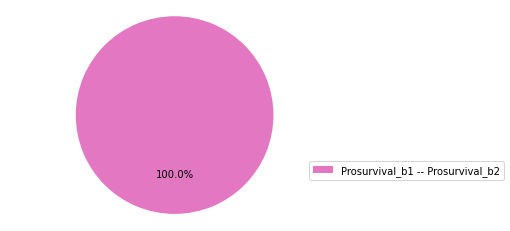

In [118]:
CHEMBL1789941_cas_2_1uM_sim = cas_2_sim.copy()

CHEMBL1789941_cas_2_1uM_sim.mutate("JAK_f", "OFF") 
CHEMBL1789941_cas_2_1uM_sim.mutate("ROCK1", "OFF") 
CHEMBL1789941_cas_2_1uM_sim.mutate("BMPR2", "OFF") 
CHEMBL1789941_cas_2_1uM_sim.mutate("IRAK1", "OFF") 
CHEMBL1789941_cas_2_1uM_sim.mutate("MAP2K3", "OFF") 
CHEMBL1789941_cas_2_1uM_sim.mutate("MAP3K7", "OFF") 
CHEMBL1789941_cas_2_1uM_sim.mutate("PLK1", "OFF") 
CHEMBL1789941_cas_2_1uM_sim.mutate("RSK_f", "OFF") 
CHEMBL1789941_cas_2_1uM_sim.mutate("MSK_f", "OFF") 

CHEMBL1789941_cas_2_1uM_res = CHEMBL1789941_cas_2_1uM_sim.run()

CHEMBL1789941_cas_2_1uM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 2. **Growth sum: +2**

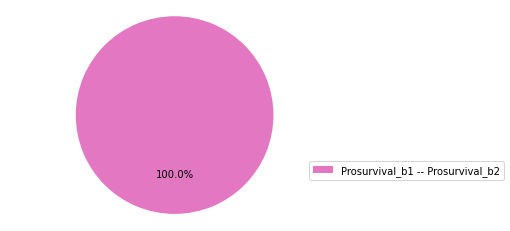

In [119]:
CHEMBL1789941_cas_2_10uM_sim = cas_2_sim.copy()

CHEMBL1789941_cas_2_10uM_sim.mutate("JAK_f", "OFF") 
CHEMBL1789941_cas_2_10uM_sim.mutate("ROCK1", "OFF") 
CHEMBL1789941_cas_2_10uM_sim.mutate("BMPR2", "OFF") 
CHEMBL1789941_cas_2_10uM_sim.mutate("IRAK1", "OFF") 
CHEMBL1789941_cas_2_10uM_sim.mutate("MAP2K3", "OFF") 
CHEMBL1789941_cas_2_10uM_sim.mutate("MAP3K7", "OFF") 
CHEMBL1789941_cas_2_10uM_sim.mutate("PLK1", "OFF") 
CHEMBL1789941_cas_2_10uM_sim.mutate("RSK_f", "OFF") 
CHEMBL1789941_cas_2_10uM_sim.mutate("CK1_f", "OFF") 
CHEMBL1789941_cas_2_10uM_sim.mutate("IKBKB", "OFF") 
CHEMBL1789941_cas_2_10uM_sim.mutate("JNK_f", "OFF") 
CHEMBL1789941_cas_2_10uM_sim.mutate("MEK_f", "OFF") 
CHEMBL1789941_cas_2_10uM_sim.mutate("MAP2K4", "OFF") 
CHEMBL1789941_cas_2_10uM_sim.mutate("MSK_f", "OFF") 
CHEMBL1789941_cas_2_10uM_sim.mutate("RAF_f", "OFF") 
CHEMBL1789941_cas_2_10uM_sim.mutate("RTPK_f", "OFF") 

CHEMBL1789941_cas_2_10uM_res = CHEMBL1789941_cas_2_10uM_sim.run()

CHEMBL1789941_cas_2_10uM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 2. **Growth sum: +2**

## SB-505124 (CHEMBL1824446)

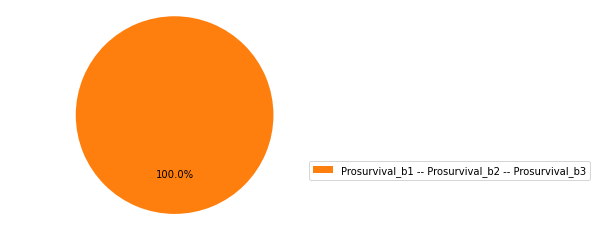

In [120]:
CHEMBL1824446_cas_2_sim = cas_2_sim.copy()

CHEMBL1824446_cas_2_sim.mutate("TGFBR1", "OFF")
CHEMBL1824446_cas_2_sim.mutate("ACVR1", "OFF") #ACVR1B, ACVR1C

CHEMBL1824446_cas_2_res = CHEMBL1824446_cas_2_sim.run()

CHEMBL1824446_cas_2_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

### Target profiles according to Binding Affinity 

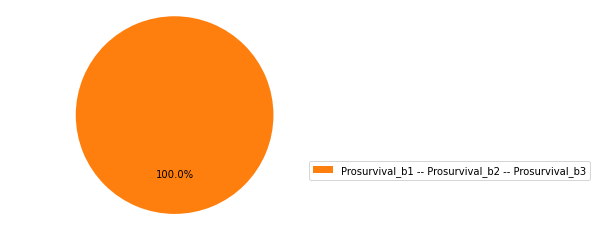

In [121]:
CHEMBL1824446_cas_2_100nM_sim = cas_2_sim.copy()

CHEMBL1824446_cas_2_100nM_sim.mutate("TGFBR1", "OFF")
CHEMBL1824446_cas_2_100nM_sim.mutate("ACVR1", "OFF") #ACVR1B
CHEMBL1824446_cas_2_100nM_sim.mutate("MAPK14", "OFF")

CHEMBL1824446_cas_2_100nM_res = CHEMBL1824446_cas_2_100nM_sim.run()

CHEMBL1824446_cas_2_100nM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

## D4476 (CHEMBL410456)

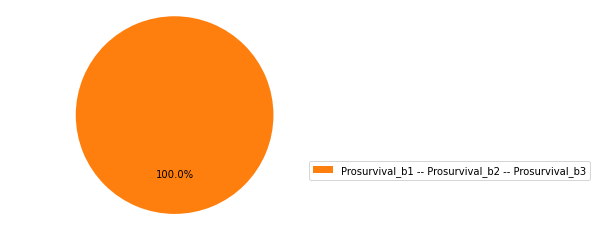

In [122]:
CHEMBL410456_cas_2_sim = cas_2_sim.copy()

CHEMBL410456_cas_2_sim.mutate("CK1_f", "OFF")
CHEMBL410456_cas_2_sim.mutate("TGFBR1", "OFF") 

CHEMBL410456_cas_2_res = CHEMBL410456_cas_2_sim.run()

CHEMBL410456_cas_2_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

### Target profiles according to Binding Affinity 

Only to measurments preformed for this drug, and none for TGFBR1.

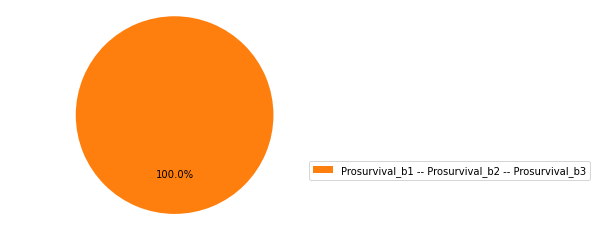

In [123]:
CHEMBL410456_cas_2_10nM_sim = cas_2_sim.copy()

CHEMBL410456_cas_2_10nM_sim.mutate("CK1_f", "OFF")

CHEMBL410456_cas_2_10nM_res = CHEMBL410456_cas_2_10nM_sim.run()

CHEMBL410456_cas_2_10nM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

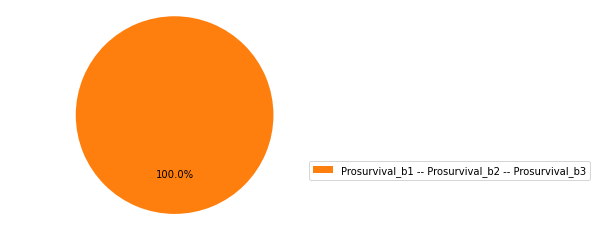

In [124]:
CHEMBL410456_cas_2_1uM_sim = cas_2_sim.copy()

CHEMBL410456_cas_2_1uM_sim.mutate("CK1_f", "OFF")
CHEMBL410456_cas_2_1uM_sim.mutate("MAPK14", "OFF")

CHEMBL410456_cas_2_1uM_res = CHEMBL410456_cas_2_1uM_sim.run()

CHEMBL410456_cas_2_1uM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

## 10058-F4 (CHEMBL1568415)

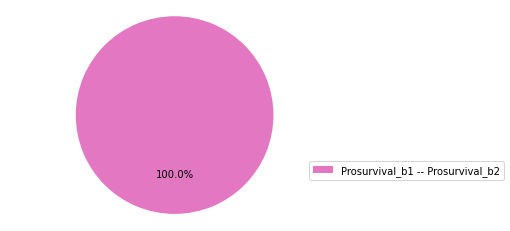

In [125]:
CHEMBL1568415_cas_2_sim = cas_2_sim.copy()

CHEMBL1568415_cas_2_sim.mutate("MYC", "OFF")

CHEMBL1568415_cas_2_res = CHEMBL1568415_cas_2_sim.run()

CHEMBL1568415_cas_2_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 2. **Growth sum: +2**

### Target Profiles According to Binding Affinity

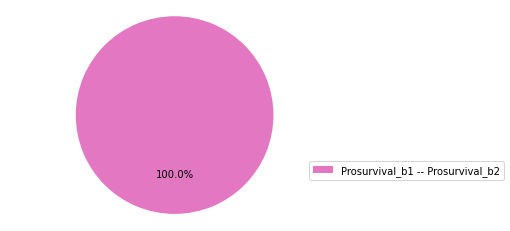

In [126]:
CHEMBL1568415_cas_2_10uM_sim = cas_2_sim.copy()

CHEMBL1568415_cas_2_10uM_sim.mutate("MYC", "OFF")

CHEMBL1568415_cas_2_10uM_res = CHEMBL1568415_cas_2_10uM_sim.run()

CHEMBL1568415_cas_2_10uM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 2. **Growth sum: +2**

## Static (CHEMBL1337170)

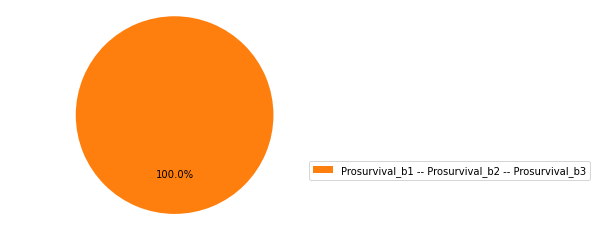

In [127]:
CHEMBL1337170_cas_2_sim = cas_2_sim.copy()

CHEMBL1337170_cas_2_sim.mutate("STAT3", "OFF")

CHEMBL1337170_cas_2_res = CHEMBL1337170_cas_2_sim.run()

CHEMBL1337170_cas_2_res.plot_piechart()

### Target Profiles According to Binding Affinity

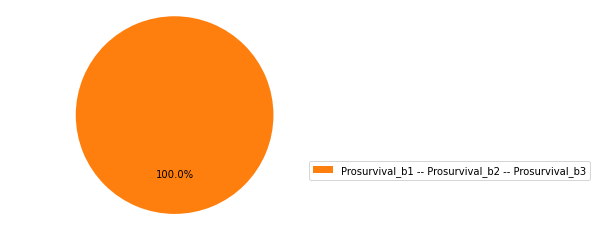

In [128]:
CHEMBL1337170_cas_2_10uM_sim = cas_2_sim.copy()

CHEMBL1337170_cas_2_10uM_sim.mutate("STAT3", "OFF")

CHEMBL1337170_cas_2_10uM_res = CHEMBL1337170_cas_2_10uM_sim.run()

CHEMBL1337170_cas_2_10uM_res.plot_piechart()

## GSK2334470 (CHEMBL1765740)

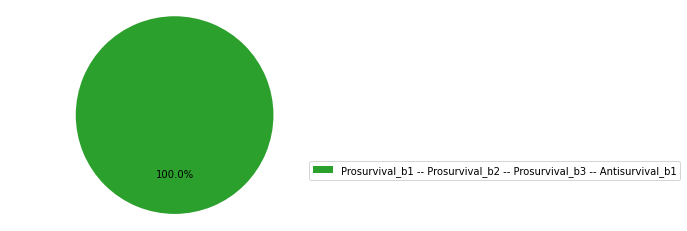

In [129]:
CHEMBL1765740_cas_2_sim = cas_2_sim.copy()

CHEMBL1765740_cas_2_sim.mutate("PDPK1", "OFF")

CHEMBL1765740_cas_2_res = CHEMBL1765740_cas_2_sim.run()

CHEMBL1765740_cas_2_res.plot_piechart()

100%: Antisurvival = 1, Prosurvival = 3. **Growth sum: +2**

### Target Profiles According to Binding Affinity

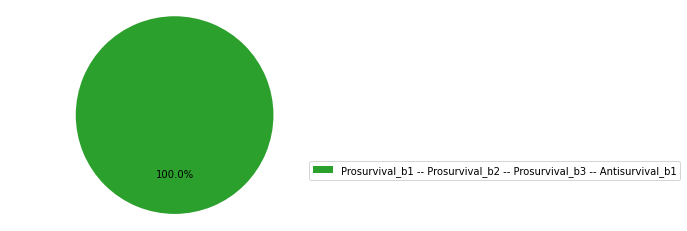

In [130]:
CHEMBL1765740_cas_2_10nM_sim = cas_2_sim.copy()

CHEMBL1765740_cas_2_10nM_sim.mutate("PDPK1", "OFF")

CHEMBL1765740_cas_2_10nM_res = CHEMBL1765740_cas_2_10nM_sim.run()

CHEMBL1765740_cas_2_10nM_res.plot_piechart()

100%: Antisurvival = 1, Prosurvival = 3. **Growth sum: +2**

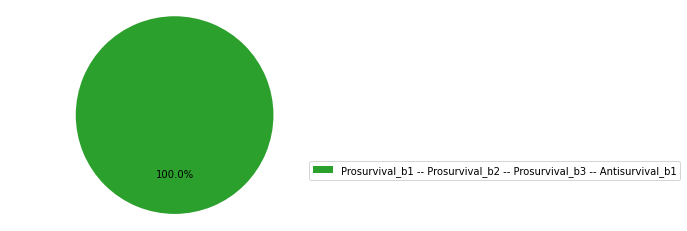

In [131]:
CHEMBL1765740_cas_2_10uM_sim = cas_2_sim.copy()

CHEMBL1765740_cas_2_10uM_sim.mutate("PDPK1", "OFF")
CHEMBL1765740_cas_2_10uM_sim.mutate("ROCK1", "OFF")

CHEMBL1765740_cas_2_10uM_res = CHEMBL1765740_cas_2_10uM_sim.run()

CHEMBL1765740_cas_2_10uM_res.plot_piechart()

100%: Antisurvival = 1, Prosurvival = 3. **Growth sum: +2**

## GSK429286 (CHEMBL375312)

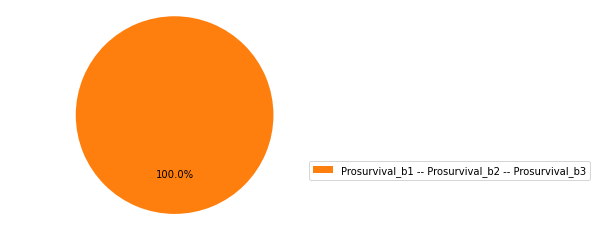

In [132]:
CHEMBL375312_cas_2_sim = cas_2_sim.copy()

CHEMBL375312_cas_2_sim.mutate("ROCK1", "OFF")

CHEMBL375312_cas_2_res = CHEMBL375312_cas_2_sim.run()

CHEMBL375312_cas_2_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

### Target Profiles According to Binding Affinity

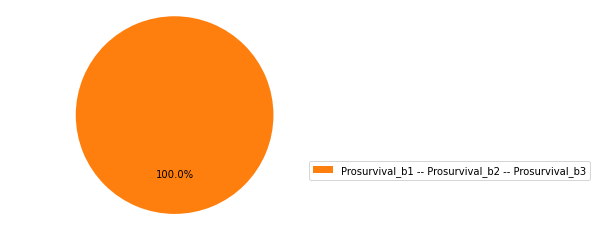

In [133]:
CHEMBL375312_cas_2_100nM_sim = cas_2_sim.copy()

CHEMBL375312_cas_2_100nM_sim.mutate("ROCK1", "OFF")

CHEMBL375312_cas_2_100nM_res = CHEMBL375312_cas_2_100nM_sim.run()

CHEMBL375312_cas_2_100nM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

## PRT 062607 (P505-15) (CHEMBL2177736)

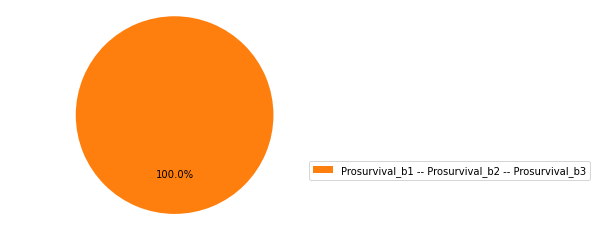

In [134]:
CHEMBL2177736_cas_2_sim = cas_2_sim.copy()

CHEMBL2177736_cas_2_sim.mutate("SYK", "OFF")

CHEMBL2177736_cas_2_res = CHEMBL2177736_cas_2_sim.run()

CHEMBL2177736_cas_2_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

### Target profiles according to Binding Affinity 

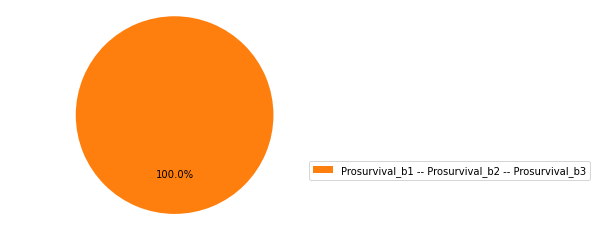

In [135]:
CHEMBL2177736_cas_2_10nM_sim = cas_2_sim.copy()

CHEMBL2177736_cas_2_10nM_sim.mutate("SYK", "OFF")

CHEMBL2177736_cas_2_10nM_res = CHEMBL2177736_cas_2_10nM_sim.run()

CHEMBL2177736_cas_2_10nM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

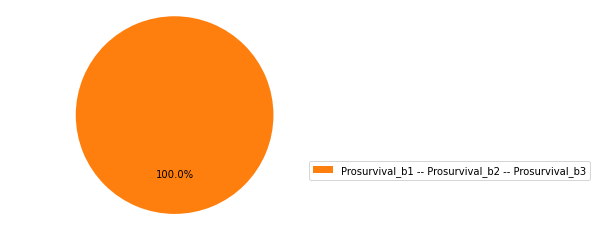

In [136]:
CHEMBL2177736_cas_2_100nM_sim = cas_2_sim.copy()

CHEMBL2177736_cas_2_100nM_sim.mutate("SYK", "OFF")
CHEMBL2177736_cas_2_100nM_sim.mutate("PRKCA", "OFF")

CHEMBL2177736_cas_2_100nM_res = CHEMBL2177736_cas_2_100nM_sim.run()

CHEMBL2177736_cas_2_100nM_res.plot_piechart()

100%: Antisurvival = 0, Prosurvival = 3. **Growth sum: +3**

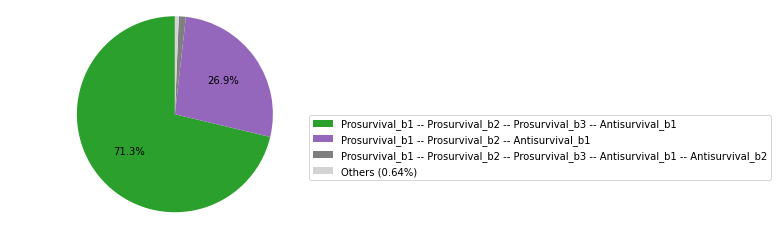

In [137]:
CHEMBL2177736_cas_2_1uM_sim = cas_2_sim.copy()

CHEMBL2177736_cas_2_1uM_sim.mutate("SYK", "OFF")
CHEMBL2177736_cas_2_1uM_sim.mutate("PRKCA", "OFF")
CHEMBL2177736_cas_2_1uM_sim.mutate("RTPK_f", "OFF")
CHEMBL2177736_cas_2_1uM_sim.mutate("SRC", "OFF")

CHEMBL2177736_cas_2_1uM_res = CHEMBL2177736_cas_2_1uM_sim.run()

CHEMBL2177736_cas_2_1uM_res.plot_piechart()

71.3%: Antisurvival = 1, Prosurvival = 3. **Growth sum: +2** \
26.9%: Antisurvival = 1, Prosurvival = 2. **Growth sum: +1** \
1.2%: Antisurvival = 2, Prosurvival = 3. **Growth sum: +1** \
0.64%: Others \

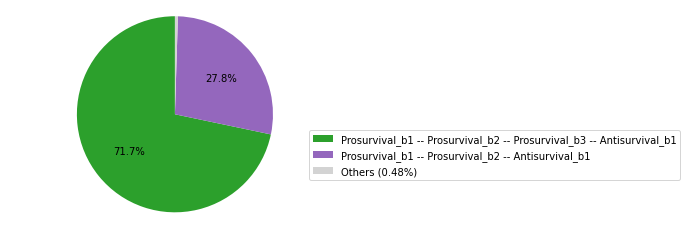

In [139]:
CHEMBL2177736_cas_2_10uM_sim = cas_2_sim.copy()

CHEMBL2177736_cas_2_10uM_sim.mutate("JAK_f", "OFF")
CHEMBL2177736_cas_2_10uM_sim.mutate("PRKCA", "OFF")
CHEMBL2177736_cas_2_10uM_sim.mutate("RTPK_f", "OFF")
CHEMBL2177736_cas_2_10uM_sim.mutate("SYK", "OFF")
CHEMBL2177736_cas_2_10uM_sim.mutate("SRC", "OFF")

CHEMBL2177736_cas_2_10uM_res = CHEMBL2177736_cas_2_10uM_sim.run()

CHEMBL2177736_cas_2_10uM_res.plot_piechart()

71.7%: Antisurvival = 1, Prosurvival = 3. **Growth sum: +2** \
27.8%: Antisurvival = 1, Prosurvival = 2. **Growth sum: +1**